# <font color= darkblue> Modelos Estadísticos para el Análisis de la Dirección Diaria del Bitcoin</font>
###### <font color= green> "Finance is not a plug-and-play subject as it relates to machine learning. Modelling financial series is harder than driving cars or recognizing faces." (Marcos Lopez de Prado)</font>
\author{Agustin Muñoz Gonzalez} \date{Julio 2021}

\maketitle
\makeatletter
\renewcommand{\@seccntformat}[1]{}
\makeatother

##### <font color= darkblue> Abstract
    
A pesar de que las aplicaciones de las redes neuronales profundas (deep learning) les han permitido a los inversores estimar la dirección del movimiento de activos financieros, aún no existen demasiados resultados sobre estas aplicaciones para las llamadas ''divisas alternativas'' como el Bitcoin (BTC), que ha tenido un crecimiento fenomenal durante el 2020. Es por eso que consideramos pertinente estudiar y explorar aplicaciones de inversión de diversos modelos estadísticos típicos, y no tan típicos, de la ciencia de datos para el problema de estimar la dirección diaria futura del BTC. En particular, el anteúltimo modelo mostrado es una red neuronal LSTM cuya topología es distinta de las redes clásicas y las vuelve especialmente útiles para trabajar con datos que tienen una dependencia temporal de corto y largo plazo, como son las series temporales financieras. Hemos utilizado en este proyecto el lenguaje Python y datos históricos reales del BTC. La originalidad del trabajo se debe no sólo a la aplicación de diversos modelos estadísticos sino a la incorporación de métricas llamadas ''on-chain'' ligadas pura y exclusivamente a la block chain, y que están tomando cada vez mas relevancia.

##### <font color= darkblue> Key words:</font> 

<font color= dimgray> Data-science – Statistical learning – Deep Learning – Long Short-Term Memory Neural Networks – Bitcoin – Asset Movement Prediction</font> 

##### <font color= darkblue> Introducción 

En este proyecto analizaremos la aplicación y performance de distintos modelos al problema de la clasifiación del movimiento diario del Bitcoin. Es decir, la variable respuesta será una variable categórica binaria: $+1$ si el precio de cierre del próximo día es mayor al último cierre y $0$ en caso contrario.

Si bien el BTC (Bitcoin) ha sido desarrollado hace varias años ya, recientemente ha captado la atención tanto de los inversores institucionalistas como de los retailers. Debido a que todavía es una tecnología novedosa incluso entre los expertos no está del todo claro qué factores afectan su movimiento. Es por eso que las variables explicativas (features) que consideraremos intentarán cubrir aspectos ligados a factores que pueden ser relevantes, los mismos son:

\begin{itemize}
\item Precio del BTC;
\item El proceso de ''price discovery'' del BTC (nuevos highs y lows);
\item ''Market sentiment'': indicadores típicos que hacen las veces de un termómetro y narrativa del mercado;
\item Indicadores técnicos;
\item Métricas ''On-chain'': Métricas típicas de la Blockchain.
\end{itemize}

Hemos separado el trabajo en dos partes. 
    
En la primera parte nos dedicaremos a armar el set de datos del BTC con datos obtenidos del exchange Bitstamp mediante el sitio quandl.com. Además, obtendremos los datos asociados a las variables explicativas, mencionadas anteriormente, de los sitios Investing.com y docs.coinmetrics.io. Luego, haremos una selección de las variables más relevantes según el paradigma explicativo. Finalmente, terminaremos preparando los sets de entrenamiento y testeo que utilizaremos en la segunda parte. 
    
En la segunda parte construiremos varios modelos estadísticos en orden creciente en complejidad. Además, analizaremos y compararemos el desempeño de cada uno. Más aún, mostraremos algunos problemas típicos de la ciencia de datos como son el problema de sobreajuste de un modelo o la poca cantidad de datos disponibles, y algunas ideas para superarlos. Finalmente, graficaremos las estrategias resultantes de seguir las predicciones de cada modelo.

Por último, en la conclusión haremos la comparativa final entre los modelos según distintas métricas como son velocidad de convergencia del algoritmo, puntaje de predicción y grado de sobreajuste, para encontrar los mejores modelos.

La bibliografía se encuentra al final, con papers, links webs, libros, etc, relacionados con las temáticas tratadas y que hemos utilizado a lo largo del trabajo.

\clearpage

# <font color= darkblue> Parte I: Análisis Exploratorio de Datos \& Ingeniería de los Features</font>


## <font color= darkblue> Obtención de datos, preprocesado de los mismos y definición de los features</font>

Una serie temporal es una serie de datos indexados temporalmente. En general, una serie temporal es una secuencia de observaciones obtenidas en intervalos de tiempo regulados y fijos, y donde la frecuencia de las observaciones puede ser en segundos, minutos, horas, diaria, mensual, trimestral y anual. Los datos del precio de cierre diario del BTC es un ejemplo de serie temporal diaria.

El primer paso hacia cualquier análisis de datos es obtener los datos ''crudos''. Esto involucra obtener los datos desde una fuente y limpiar/completar los datos faltantes.

### <font color= darkblue>Importando librerías necesarias</font>

Inicialmente importamos varias librerías y paquetes de Python que usaremos a lo largo del trabajo, los mismos cubrirán aspectos sobre visualización, exploración y análisis de datos, como también visualización de resultados. 

Además, importaremos varios modulos de subpaquetes de Keras necesarios para la creación de los modelos y la medición de la performance de los mismos. Keras es una API de Python y es una de las librerías mas poderosas y amigables para el usuario que está basada, a su vez, en la popular librería TensorFlow para la creación de modelos de machine learning y deep learning.

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import time
#import math

# Sklearn
import sklearn
# Preprocessor from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Keras
import keras
# ANNs from keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout, Dense, LSTM

# Import cufflinks for visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(20,10)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Feature selection
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from skpp import ProjectionPursuitRegressor
from skpp import ProjectionPursuitClassifier
# # ANNs
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.models import load_model, Model

# Model Metrics
from sklearn.metrics import accuracy_score
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Resample
# Block Bootstrap
from arch.bootstrap import StationaryBootstrap
# Time Series cross-validation
from sklearn.model_selection import TimeSeriesSplit

# Class encoder
from sklearn.preprocessing import LabelEncoder 

KeyboardInterrupt: 

Seteamos las semillas correspondientes para que el trabajo sea reproducible.

In [ ]:
# We set a seed value in order to be able of reproduce the results.
seed_value= 123
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
# import tensorflow as tf
# tf.set_random_seed(seed_value)

from numpy.random import seed
seed(123)

### <font color= darkblue> Recolección de datos</font>
El trabajo se basa en datos de los sitios Bitsamp (via quand.com), Investing.com y docs.coinmetrics.io. Si bien en un principio consideraremos datos históricos de BTC desde el 15 de Abril del 2014, cuando limpiemos por datos faltantes y armemos el dataframe con todas las features, terminaremos usando datos históricos con frecuancia diaria desde el 23 de Febrero del 2017 hasta el 15 de Marzo de 2021, es decir, alrededor de 1000 datos.

In [ ]:
Bitcoin=pd.read_csv('data/BITSTAMP-USD.csv', index_col=0, parse_dates=True)[::-1].dropna()
Bitcoin.head()

#### <font color= darkblue>Visualización de la fluctuación del BTC</font>

In [ ]:
Bitcoin['Last'].plot(figsize=(20,10),color='black');

De nuevo, las variables explicativas que manejaremos cubrirán los siguentes aspectos del BTC (y del mercado en general):

\begin{itemize}
\item Factores ligados directamente al precio ''spot'' del BTC y al proceso de price discovery tales como: precios diarios de futuros del BTC y precios diarios de Ethereum;
\item Indicadores macro: algunos commodities importantes como el precio diario del crudo, el tesoro a 10 años de Estados Unidos y el índice de volatilidad de los mercados, VIX;
\item Indicadores técnicos ligados al volúmen, momentum, volatilidad y datos de velas diarias de BTC;
\item Metricas on-chain, i.e., métricas relacionadas pura y exclusivamente con la Blockchain.
\end{itemize}

#### <font color= darkblue> Features</font>

\begin{center}
	\begin{tabular}{|p{0.3\linewidth} | p{0.6\linewidth}|}
		\hline
		\textbf{CME\_BitcoinFutures} & Contratos futuros diarios del Bitcoin\\ \hline
		\textbf{ETH} & Datos de cierre diarios de Ethereum\\ \hline
		\textbf{CRUDE, Gold, Treasury\_10} & Futuros de OIL y de Oro, y precios de cierre del yield del tesoro americano a 10 años\\ \hline
		\textbf{SPY} & Futuros del S\&P\\ \hline
		\textbf{ATR} & Average True Range (ATR): Un indicador técnico de la volatilidad del BTC\\ \hline
		\textbf{OBV} & On-balance volume (OBV) es un indicador técnico de momentum que utiliza el volumen diario del Bitcoin\\ \hline
		\textbf{sma14, sma60} & Medias móviles simples a 14 y 60 días del precio de cierre diario del Bitcoin\\ \hline
		\textbf{vol14, vol60} & Indices de volatilidad implícita de 14 y 60 días de los retornos diarios del Bitcoin\\ \hline
		\textbf{sma20, b\_upper, b\_lower} & Las Bollinger Bands son otro indicador técnico utilizado para medir la sobrecompra o sobreventa de un activo\\ \hline
		\textbf{MOM5D} & Momentum a 5 dias del retorno diario del Bitcoin\\ \hline
		\textbf{High, Low, Last, Bid, Ask, VWAP, Volume} & Datos técnicos diarios del Bitcoin\\ \hline
		\textbf{Returns} & Los retornos respecto al precio de cierre del Bitcoin del día anterior \\ \hline
		\textbf{MVRV\_FF} & Cociente entre la capitalización de mercado de bitcoin y su capitalización efectiva (market-value-to-realized-value). Esta última toma en cuenta, para un determinado grupo de BTC, el precio que tenían la última vez que fueron movidos\\ \hline
		\textbf{HashRate} & Velocidad a la que se completan los cálculos (proof-of-work) en todos los mineros de la red.\\ \hline
		\textbf{Miner\_revenue} & La suma del valor en USD de todos los ingresos de los mineros (tarifas más unidades nativas emitidas recientemente) diario.\\ \hline
	\end{tabular}
\end{center}

Definimos las funciones que usaremos para el cálculo de algunas de las features anteriores.

In [ ]:
# we assume that df's order is increasing in dates
def ATR(df,n):
    "function to calculate True Range and Average True Range"
    df = df.copy()

    df['H-L']  = abs(df['High']-df['Low'])
    df['H-PO'] = abs(df['High']-df['Open'].shift(1))
    df['L-PO'] = abs(df['Low']-df['Open'].shift(1))
    
    df['TR']   = df[['H-L','H-PO','L-PO']].max(axis=1,skipna=False)
    df['ATR']  = df['TR'].rolling(n).mean()

    df2 = df.drop(['H-L','H-PO','L-PO'],axis=1)
    return df2

def OBV(df):
	n=len(df)
	OBV=[]
	OBV.append(0)
	for i in range(0,n-1):
		if df['Price'][i]<df['Price'][i+1]:
			OBV.append(OBV[i]+df['Volume'][i+1])
		elif df['Price'][i]>df['Price'][i+1]:
			OBV.append(OBV[i]-df['Volume'][i+1])
	return OBV

# 'CME_BitcoinFutures' and 'ETH' data is expressed as string, so we have to convert it to float.
def text_currency_to_float(text):
  t = text
  dot_pos = t.rfind('.')
  comma_pos = t.rfind(',')
  if comma_pos > dot_pos:
    t = t.replace(".", "")
    t = t.replace(",", ".")
  else:
    t = t.replace(",", "")

  return(float(t))

Cargamos los demás datos necesarios.

In [ ]:
# Crudo
CRUDE=pd.read_csv('data/Crude Oil WTI Futures Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
# 10-Y Treasury
Treasury_10=pd.read_csv('data/United States 10-Year Bond Yield Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
# S&P Index
SPY=pd.read_csv('data/SPY Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
# GOLD
Gold=pd.read_csv('data/Gold Futures Historical Data.csv', index_col=0, parse_dates=True, thousands=',')['Price'].dropna()
# Gold=Gold[::-1]
CRUDE.head(),Treasury_10.head(),SPY.head(),Gold.head()

Procedemos a armar el dataframe con todos las features y la muestra de datos por un lado, y un dataframe con la variable respuesta correspondiente por otro.

Empecemos por los factores ligados directamente con BTC.

In [ ]:
# BTC's spot price related Indicators
Bitcoin['CME_BitcoinFutures']=pd.read_csv('data/Bitcoin Futures CME Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
Bitcoin['ETH']=pd.read_csv('data/Ethereum Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']

Sigamos con los factores macro.

In [ ]:
# Macro Indicators
Bitcoin['CRUDE']=CRUDE
Bitcoin['Gold']=Gold
Bitcoin['Treasury_10']=Treasury_10
Bitcoin['SPY']=SPY

Continuamos con los factores tecnicos.

In [ ]:
# BTC's returns
Bitcoin['Returns']=np.around(Bitcoin['Last'].pct_change().dropna(),3)
#ATR
Bitcoin=Bitcoin.rename(columns={'Last':'Open'}) # ATR uses 'Open' so we have to rename 'Last'
ATR_Bitcoin = ATR(Bitcoin,21)['ATR']
Bitcoin=Bitcoin.rename(columns={'Open':'Last'}) # We change it to 'Last' again
Bitcoin['ATR']=ATR_Bitcoin
#OBV
Bitcoin['OBV']=OBV(Bitcoin.rename(columns={'Last':'Price'})) # OBV uses 'Price' so we change it

# Classic Technnical Indicators
# Simple Moving Averages
# 2 week
Bitcoin['sma14'] = Bitcoin['Last'].rolling(14).mean()
# 2 month
Bitcoin['sma60'] = Bitcoin['Last'].rolling(60).mean()

# Rolling Volatility (annualized assuming 365 trading days)
# 2 week
Bitcoin['vol14'] = Bitcoin['Returns'].rolling(14).std() * np.sqrt(365)
# 2 month
Bitcoin['vol60'] = Bitcoin['Returns'].rolling(60).std() * np.sqrt(365)


# Bollinger Bands
# 20 day simple moving average
Bitcoin['sma20'] = Bitcoin['Last'].rolling(20).mean()
# Upper band
Bitcoin['b_upper'] = Bitcoin['sma20'] + 2 * Bitcoin['sma20'].rolling(20).std()
# Lower band
Bitcoin['b_lower'] = Bitcoin['sma20'] - 2 * Bitcoin['sma20'].rolling(20).std()

# Momentum
MOM5D=np.around([Bitcoin['Last'][t]-Bitcoin['Last'][t-5] for t in range(5,len(Bitcoin['Last']))],3)
# For these features we have to reduce the sample size due to min{len(MOM5D),len(STD21D)}<len(Bitcoin)
N=len(MOM5D)
Bitcoin=Bitcoin[::-1].iloc[range(0,N)] 
Bitcoin=Bitcoin[::-1] 
Bitcoin['MOM5D']=MOM5D

Finalizamos con los factores on-chain.

In [ ]:
# On-chain metrics
on_chain_metrics=pd.read_csv('data/btc.csv', index_col=0, parse_dates=True).dropna()
Bitcoin['MVRV_FF']=on_chain_metrics['CapMVRVFF']
Bitcoin['HashRate']=on_chain_metrics['HashRate']
Bitcoin['Miner_revenue']=on_chain_metrics['RevUSD']

Acomodemos los ultimos detalles del dataset.

In [ ]:
# We drop features we won't use
Bitcoin.drop('Volume',axis=1,inplace=True)
Bitcoin.drop('VWAP',axis=1,inplace=True)

# We drop NANs
Bitcoin=Bitcoin.dropna()
Bitcoin=Bitcoin[::-1] # We let it ordered decresently

# We transform string value to float
n_1=len(Bitcoin['CME_BitcoinFutures'])
n_2=len(Bitcoin['ETH'])
for i in range(0,n_1):
	Bitcoin['CME_BitcoinFutures'][i]=text_currency_to_float(Bitcoin['CME_BitcoinFutures'][i])
for i in range(0,n_2):
	Bitcoin['ETH'][i]=text_currency_to_float(Bitcoin['ETH'][i])

In [1]:
X=Bitcoin.copy()
X.head()

NameError: name 'Bitcoin' is not defined

El listado final de features es el siguiente.

In [67]:
list(X.keys())

['High',
 'Low',
 'Last',
 'Bid',
 'Ask',
 'CME_BitcoinFutures',
 'ETH',
 'CRUDE',
 'Gold',
 'Treasury_10',
 'SPY',
 'Returns',
 'ATR',
 'OBV',
 'sma14',
 'sma60',
 'vol14',
 'vol60',
 'sma20',
 'b_upper',
 'b_lower',
 'MOM5D',
 'MVRV_FF',
 'HashRate',
 'Miner_revenue']

Por último, armamos el dataframe con la variable respuesta, es decir la dirección del movimiento diario futuro del BTC. Notar que esta dirección puede interpretarse matemáticamente como el signo del retorno.

In [68]:
# Our response feature will be the sign of BTC's returns (i.e. movement direction)
Y=pd.DataFrame({
	'Sign': np.sign(X['Returns'])})
# We transform 0's into 1's in order to work with a binary classification problem. We could have used LabelEncoder().
for i in range(len(Y['Sign'])):
	if Y['Sign'][i]==0:
		Y['Sign'][i]=1

In [69]:
X.head(), Y.head()

(                High       Low      Last       Bid       Ask  \
 Date                                                           
 2021-03-15  60748.78  54555.00  56196.91  56174.41  56188.70   
 2021-03-12  58155.99  54269.00  57881.67  57847.33  57877.59   
 2021-03-11  57402.89  53010.00  55853.90  55914.60  55920.20   
 2021-03-10  54939.26  51857.00  54927.29  54901.04  54927.49   
 2021-03-09  52427.91  49316.98  52427.91  52432.31  52439.00   
 
            CME_BitcoinFutures      ETH  CRUDE    Gold  Treasury_10  ...  \
 Date                                                                ...   
 2021-03-15              56900  1792.38  65.39  1729.2        1.607  ...   
 2021-03-12              57075   1766.9  65.61  1719.8        1.625  ...   
 2021-03-11              57955  1825.79  66.02  1722.6        1.535  ...   
 2021-03-10              56620  1794.14  64.44  1721.8        1.521  ...   
 2021-03-09              54720   1869.1  64.01  1716.9        1.528  ...   
 
         

Escalamos los datos para evitar problemas provocados por órdenes de magnitudes distintos.

In [70]:
# We escalate the data in order to perform the feature selection methods
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# We let X as a dataframe
X=pd.DataFrame(scaled_X,columns=list(Bitcoin.keys()),index=Bitcoin.index)  

In [71]:
X.head()

,High,Low,Last,Bid,Ask,CME_BitcoinFutures,ETH,CRUDE,Gold,Treasury_10,...,sma60,vol14,vol60,sma20,b_upper,b_lower,MOM5D,MVRV_FF,HashRate,Miner_revenue
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,1.000000,0.982002,0.970420,0.970610,0.970344,0.981513,0.915979,0.903367,0.580725,0.401540,...,1.000000,0.399087,0.630384,1.000000,0.892641,1.000000,0.550266,0.631542,0.900243,0.932720
2021-03-12,0.956582,0.976766,1.000000,1.000000,1.000000,0.984580,0.902861,0.905296,0.569140,0.408141,...,0.973884,0.301618,0.644549,0.992983,0.908815,0.966071,0.969812,0.662347,0.912653,0.968008
2021-03-11,0.943971,0.953714,0.964397,0.966046,0.965630,1.000000,0.933178,0.908892,0.572591,0.375138,...,0.966279,0.339663,0.652203,0.991131,0.919178,0.949806,0.865844,0.676488,0.800966,0.865257
2021-03-10,0.902715,0.932604,0.948128,0.948239,0.948198,0.976606,0.916885,0.895037,0.571605,0.370004,...,0.960272,0.339663,0.652736,0.986928,0.928363,0.930087,0.838613,0.660014,0.906448,0.934387
2021-03-09,0.860661,0.886098,0.904246,0.904868,0.904502,0.943312,0.955474,0.891266,0.565566,0.372571,...,0.954790,0.413804,0.649579,0.984199,0.938601,0.912155,0.592185,0.645159,0.850605,0.856911


## <font color= darkblue> Selección de Features

Los métodos de selección de features intentan reducir el número de features considerados de forma de quedarnos sólo con los que son más ''útiles'' para el modelo.

Es menester hacer una distinción entre el tipo de análisis que estemos persiguiendo, diferenciando entre: un análisis descriptivo, un análisis predictivo o un análisis explicativo.

El análisis o paradigma descriptivo involucra una simple mención de los hechos tal y como son. Este análisis no provee conclusiones ni generalizaciones sino que pretende brindar una idea amplia del problema a tratar y un resumen o estadísticas descriptivas como la media, desviaciones estándares, y algunos gráficos para una mejor visualización de los datos. En general, los método asociados a este paradigma están en el extremo (izquierdo) del eje de complejidad de los modelos, utilizando los más simples y parsimoniosos. Acá lo que importa es el ''qué''.

El paradigma explicativo intenta no sólo describir sino, aún más, interpretar de forma intuitiva la relación entre las variables explicativas y la variable respuesta. Cuando estamos tratando con datos cuantitativos y estadísticos este análisis provee modelos matemáticos que vinculan todas las variables consideradas. Es decir, no se trata ya de describir sino de explicar las relaciones de causalidad entre los fenómenos estudiados. En general, involucran modelos estadísticos que están en el extremo derecho del eje de complejidad, utilizando métodos muy complejos. Podemos pensar que acá estamos buscando el ''por qué''.

El análisis predictivo irá un paso más allá que el explicativo en tanto que utilizará las relaciones descubiertas en los otros paradigmas en datos desconocidos y eventos futuros. Hay que tener en cuenta que este análisis puede no involucrar el mismo modelo ni las mismas features que los análisis previos (en general, las features consideradas acá seran un subgrupo de las consideradas en el paradigma explicativo). Suele involucrar modelos que están en un punto medio en el eje de complejidad, intentando equilibrar el trade-off sesgo/varianza. Este análisis puede pensarse como el ''que tal si''.

A continuación, usaremos dos métodos de selección de features que se suelen usar para el análisis explicativo. Aunque nosotros queramos realizar un análisis predictivo del fenómeno BTC, teniendo en cuenta que este suele quedarse con un subgrupo de las features consideradas en el approach explicativo, parece coherente y útil realizar esta reducción de variables explicativas. De hecho, existen muchas combinaciones posibles de features a elegir pero para no extendernos demasiado y mostrar una idea concreta, decidimos quedarnos con la que devuelven estos métodos.

#### <font color= darkblue> SelectKBest (para clasificación: f\_classif)
La clase SelectKBest puntea las features usando una cierta función (en este caso, f\_classif, pero podría ser otra) y luego se queda sólo con las $K$ features con los scores más altos. La función f\_classif es la función ANOVA F-value entre la variable respuesta y las explicativas para un problema de clasificación, donde por ANOVA F-value entendemos al test ANOVA referido al test F.

ANOVA es un acrónimo para ''analysis of variance'' (análisis de la varianza) y es un test de hipótesis para determinar si la media de dos o más muestras de datos provienen de la misma distribución.

El estadístico F, o test F, es una clase de test estadístico que calcula el ratio que representa la varianza explicada por el modelo o la varianza explicada por una prueba estadístia como ANOVA.

In [72]:
# We apply SelectKBest class to order the most relevant features with respect to f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=len(X.keys()))
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# we concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(len(X.keys()),'Score'))  #print 10 best features

                 Specs       Score
11             Returns  890.526829
21               MOM5D   54.597695
22             MVRV_FF   13.104378
7                CRUDE    1.843723
15               sma60    0.834043
9          Treasury_10    0.791836
12                 ATR    0.609570
16               vol14    0.592126
19             b_upper    0.434973
18               sma20    0.379058
17               vol60    0.370301
14               sma14    0.339373
20             b_lower    0.303481
23            HashRate    0.282368
3                  Bid    0.245523
2                 Last    0.244707
4                  Ask    0.244136
6                  ETH    0.151103
8                 Gold    0.081456
13                 OBV    0.070668
10                 SPY    0.036414
1                  Low    0.009375
5   CME_BitcoinFutures    0.005251
0                 High    0.003658
24       Miner_revenue    0.000112


Se puede ver que las variables más relevantes son Returns, MOM5D y MVRV_FF. Siguiendo en menor orden CRUDE y OBV.

#### <font color= darkblue> ExtraTreesClassifier

A continuación, mostraremos otro método de selección de features basado en árboles de decisión. Aquí vamos a limitarnos sólo a aplicar el método, explicaremos un poco más en detalle el funcionamiento que hay detras cuando los usemos como algunos de los métodos para clasificar BTC.
    
##### <font color= darkblue> Árbol de decisión (Alta Varianza)
    
Un único árbol de decisión usualmente sobreajusta los datos que intenta aprender debido a que aprende a partir de una sóla ruta de decisiones. Predicciones resultantes de un sólo árbol de decisión usualmente no son precisas en datos out-of-sample.

###### <font color= darkblue> Random Forest (Varianza Media)
    
Los modelos Random forest reducen el riesgo de overfitting introduciendo aleatoriedad como sigue:
\begin{itemize}
\item construyendo árboles múltiples (n\_estimators);
\item extrayendo observaciones con reposición (i.e., muestras bootstrappeadas);
\item dividiendo los nodos en los mejores splits dentro de subconjuntos de features elejidos aleatoriamente en cada nodo.
\end{itemize}

##### <font color= darkblue> Extremely Randomized Trees (or Extra Trees for short)
    
Es un modelo de ensemble learning.

Específicamente, es el ensamblado de árboles de decisión y está relacionado a otros ensamblados de árboles de decisión tales como bagging y random forest.

Esta clase implementa un estimador que fitea un número de árboles de decision aleatorizados (a.k.a. extra-trees) en varias sub-muestras del dataset y luego promedia para mejorar la precisión predictiva y controlar el overfitting. Árboles de decisión baggeados tales como extra-trees pueden ser usados para estimar la importancia de las features.

[0.0222907  0.02400196 0.02316062 0.02360408 0.02488308 0.02024736
 0.0231295  0.02507648 0.02370783 0.02255004 0.0229715  0.41027764
 0.02300074 0.0284889  0.01986143 0.0200545  0.02528026 0.02165071
 0.02030617 0.02071386 0.02206399 0.05043872 0.02777895 0.02790695
 0.02655405]


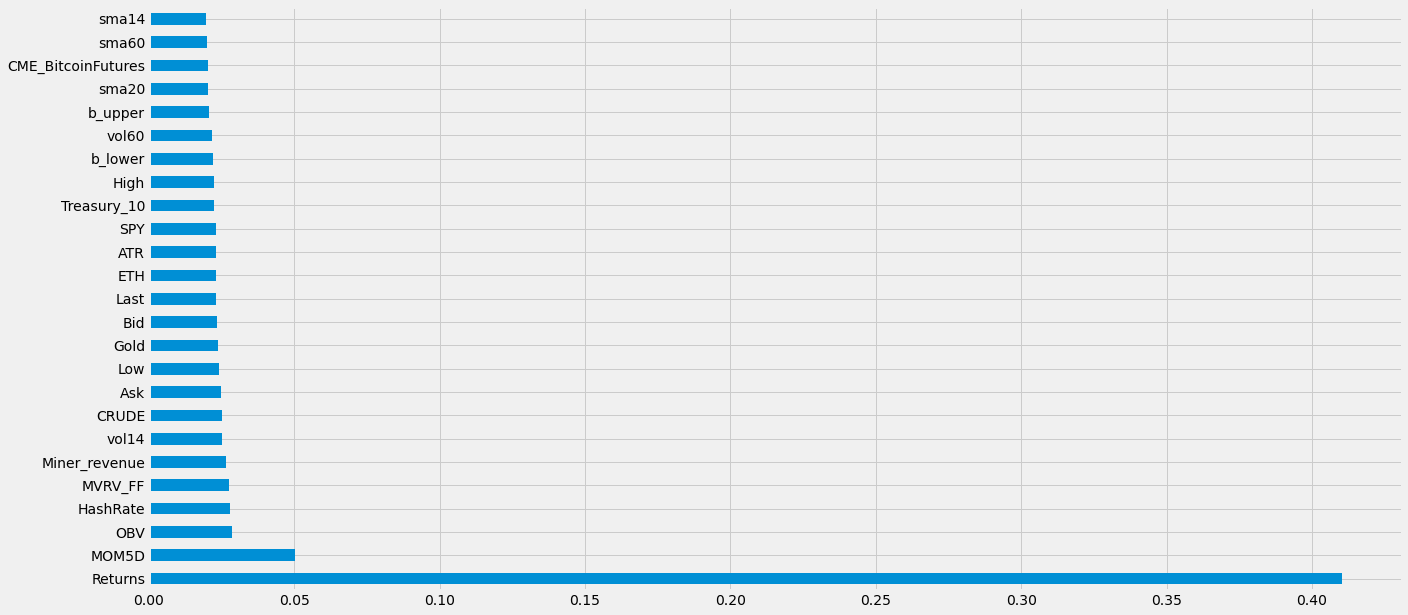

In [73]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.keys())).plot(kind='barh')
plt.show()

Notar que esta metodología vuelve a devolver como features más relevantes a Returns y MOM5D, y en menor medida a OBV.

Nos quedamos con las 5 mejores features para esta última técnica.

In [74]:
best_feat=list(featureScores.nlargest(5,'Score')['Specs'])
for i in list(featureScores['Specs']):
	if(i not in best_feat):
		X.drop(i,axis=1,inplace=True)

In [75]:
X.head()

,CRUDE,Returns,sma60,MOM5D,MVRV_FF
Date,,,,,
2021-03-15,0.903367,0.366795,1.000000,0.550266,0.631542
2021-03-12,0.905296,0.592664,0.973884,0.969812,0.662347
2021-03-11,0.908892,0.555985,0.966279,0.865844,0.676488
2021-03-10,0.895037,0.615830,0.960272,0.838613,0.660014
2021-03-09,0.891266,0.577220,0.954790,0.592185,0.645159


### <font color= darkblue> Matriz de correlación
    
La correlación (de Pearson) es una medida de dependencia lineal entre dos variables aleatorias cuantitativas. De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas. En este caso, analizaremos la correlación entre las features de nuestro dataset. El objetivo será quedarnos con features que no estén (demasiado) correlacionadas, de modo que ofrezcan distinta información.

Veamos como nos queda la matriz de correlaciones entre las features que quedaron.

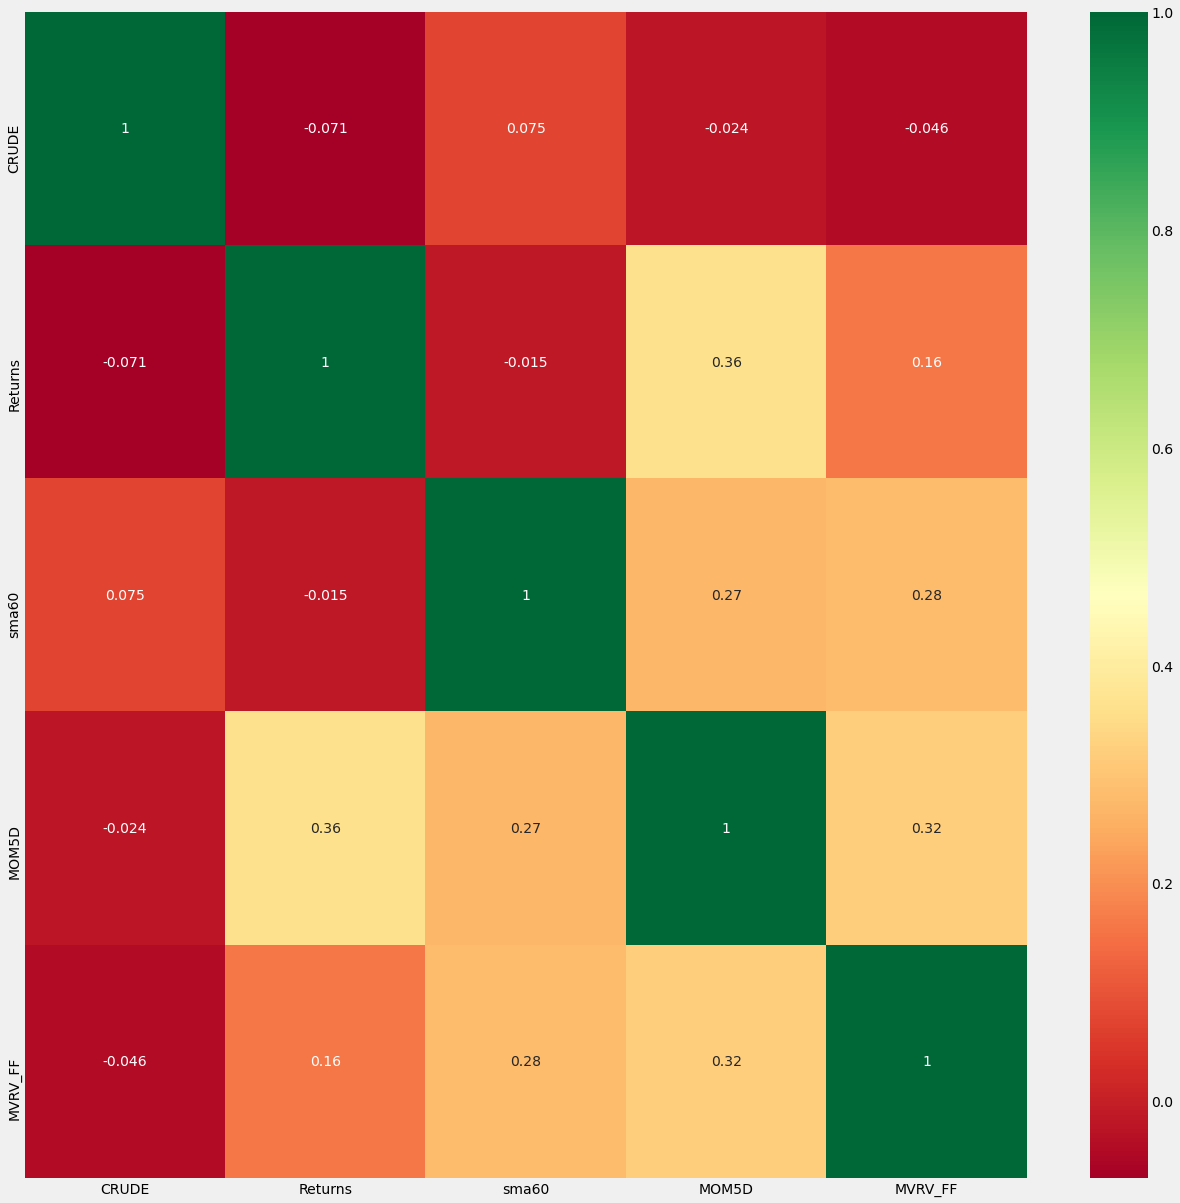

In [76]:
# Correlation Matrix with Heatmap
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

Se puede ver que hay baja correlación entre casi todas las features, lo cual nos indica que en algún sentido cada variable está aportando información distinta.

### <font color= darkblue> Split y normalización del dataset
    
El escalamiento de los features puede ayudar a los algoritmos a converger a minimos locales/globales eficientemente. Además, puede pasar que las medidas utilizadas en las features varien mucho en magnitud de una a otra pudiendo ''confundir'' al modelo, interpretando este que una feature es más relevante que las demás sólo por el hecho de utilizar números más grandes. Por ejemplo, si uno no normaliza podría suceder que en el proceso de actualización de los pesos en las redes neuronales por medio del método de descenso de gradiente, la actualización genere pasos demasiado grandes evitando que el método converja.

Usaremos el escalador MinMaxScaler de la librería Sci-kit Learn.

#### <font color= darkblue>Split de los datos</font>
Una parte critica del machine learning es tener una clara distinción entre los datos que se usarán para entrenar el modelo y los que se usarán para evaluar el poder predictivo del mismo. Por lo tanto, usaremos el clasico Train/Test split, con un Train set del 70\% de los datos.

Algunos de los métodos de machine learning que usaremos también permiten especificar si queremos considerar un Validation Set en el entrenamiento del modelo.

In [77]:
# 70% train/test split
split = int(len(X) * 0.7)

# We transform Y to a binary classification problem's values (0 y 1)
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 
encoder.fit(Y) 
encoded_Y = encoder.transform(Y) 
# We transform encoded_Y into a dataframe in order to use .iloc and being able to make the train/test split
Y = pd.DataFrame(encoded_Y, columns = ['Column_A'],index=Y.index) 

# Create train data set
# We have to twist the dataset
X_train, y_train = X[::-1][:split], Y[::-1][:split]
# Test data after train split
X_test, y_test = X[::-1][split:], Y[::-1][split:]


# Scale the features MinMax for training and test datasets
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
# We change from array to dataframe
X_train=pd.DataFrame(scaled_X_train,columns=X.columns,index=X[::-1].iloc[:split].index)
y_train=pd.DataFrame(y_train,columns=Y.columns,index=Y[::-1][:split].index)
X_test=pd.DataFrame(scaled_X_test,columns=X.columns,index=X[::-1][split:].index)
y_test=pd.DataFrame(y_test,columns=Y.columns,index=Y[::-1][split:].index)

#### <font color= darkblue> Reacomodamiento de los datos
    
Para la red neuronal LSTM necesitamos cambiar el formato de los datos dado que la red consume datos en 3 dimensiones de la forma: cantidad de datos, cantidad de time-steps y cantidad de features. 

In [78]:
# Reshaping the Data for LSTM
# reshaping into 3D Array
X_train_LSTM=np.array(scaled_X_train).reshape(len(scaled_X_train),1,len(list(X.keys()))) # len(scaled_train_data) samples; 1 timesteps per sample; 9 features per timestep or 1 samples; len(scaled_train_data) timesteps; 9 features per timestep?
X_test_LSTM=np.array(scaled_X_test).reshape(len(scaled_X_test),1,len(list(X.keys())))

\clearpage

# <font color= darkblue> Parte II:  Construcción de los modelos</font> 

A continuación, construiremos, entrenaremos y testearemos distintos modelos de la ciencia de datos para el problema en cuestión. 

Para cada modelo de ellos mostraremos su ''score'', es decir, su performance, en el test set.

En el entrenamiento de cada modelo utilizaremos la función time de Python para medir el tiempo que tarda cada modelo en estudiar el train set.

Además, para aquellos métodos que calculen coeficientes mostraremos también los valores de los coeficientes estimados, como para interpretar qué features son las más importantes para ese modelo. Notar que esta última idea podría haberse utilizado como método de feature selection o, al menos, como técnica para interpretar la relevancia de las features según cada modelo. De nuevo, para no extendernos por demás y poder cubrir las cosas que nos interesan, decidimos hacer el análisis directamente sobre el subgrupo de features que elegimos, pero cabe mencionar esta otra idea.

No indagaremos en profundidad en el funcionamiento de los métodos ya que no es la intención del trabajo, sólo mencionaremos las ideas principales. Para el que le interese más información le sugerimos visite la bibliografía.

Definimos la lista vacía runtimes en la que guardaremos todos los tiempos de entrenamiento.

In [79]:
runtimes=[]

### <font color= darkblue> 1. Naive Bayes
    
El método de Naive Bayes es un algoritmo de aprendizaje supervisado basado en la aplicación del teorema de bayes con la asunción ''naive'' o inocente de independencia condicional entre pares de features dado el valor de la clase de la variable respuesta.
    
En abstracto, el modelo de probabilidad para un clasificador es
$$p(C|F_1,\dots,F_n),$$
sobre una variable dependiente discreta $C$. Esta variable está condicionada por varias variables independientes $F_1,\dots,F_n$. Por el teorema de bayes tenemos
$$p(C|F_1,\dots,F_n)=\frac{p(C)p(F_1,\dots,F_n|C)}{p(F_1,\dots,F_n)}.$$

Como estamos asumiendo independencia, por la definición de probabilidad condicional tenemos
$$p(C,F_1,\dots,F_n)=p(C)\prod p(F_i|C).$$
    
Luego
$$p(C|F_1,\dots,F_n)=\frac{1}{Z}\prod p(F_i|C),$$
donde $Z$ es un factor que depende sólo de $F_1,\dots,F_n$.

In [80]:
mnb = MultinomialNB()

start_mnb = time.time()
mnb.fit(X_train, y_train)
end_mnb = time.time()
mnb_runtime=end_mnb - start_mnb

print('Runtime:',mnb_runtime)
print("score on test: %.3f"  %mnb.score(X_test, y_test))
print("score on train: %.3f" %mnb.score(X_train, y_train))

Runtime: 0.003798961639404297
score on test: 0.567
score on train: 0.576


In [81]:
runtimes.append(mnb_runtime)

Orendenamos las features en orden decreciente en importancia, según el valor del coeficiente asignado por el modelo para cada feature.

In [82]:
coef=list(mnb.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> -1.459
CRUDE --> -1.531
MOM5D --> -1.555
sma60 --> -1.655
MVRV_FF --> -1.904


### <font color= darkblue> 2. Logistic Regression
    
Logistic regression es un modelo estadístico que en su forma básica usa una función logística para modelar una variable respuesta binaria a través del modelo lineal múltiple. 
    
En este modelo, el logaritmo de la probabilidad (log-odds) para el valor ''+1'' es una combinación lineal de los predictores. La función que convierte el logaritmo de la probabilidad en una probabilidad se llama función logística, de ahí el nombre. La unidad de medida de la escala de las log-odds se llama logit (logistic unit).
    
El modelo es entonces
$$logit(P (Y = 1|X)) = \beta_0 + \sum \beta_i X_i.$$

In [83]:
lr=LogisticRegression(max_iter=1000)

start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()
lr_runtime=end_lr - start_lr

print('Runtime:',lr_runtime)
print("score on test: %.3f" % lr.score(X_test, y_test))
print("score on train: %.3f" % lr.score(X_train, y_train))

Runtime: 0.020827054977416992
score on test: 0.927
score on train: 0.921


In [84]:
runtimes.append(lr_runtime)

In [85]:
coef=list(lr.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 10.576
MOM5D --> 1.571
MVRV_FF --> 0.459
CRUDE --> 0.041
sma60 --> -0.524


### <font color= darkblue> 3. K-Nearest Neighbours
    
El método de clasificación k-NN es un métedo que se basa en clasificar según la pluralidad de los votos de los $K$ vecinos ''mas cercanos'' del punto de la muestra que queremos clasificar y para una cierta noción de distancia. Por ejemplo, si $K=1$ el objeto se clasificará como la clase de su vecino más próximo.

Como este algoritmo se basa en una distancia, si las features están representadas en distintas unidades o en escalas muy diferentes, la normalización de los datos puede mejorar dramáticamente la perfomance del método.

Una peculiaridad del algotimo K-NN es su sensibilidad a la estructura local de los datos.

In [86]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

start_knn = time.time()
knn.fit(X_train, y_train)
end_knn = time.time()
knn_runtime=end_knn - start_knn

print('Runtime:',knn_runtime)
print("score on test: %.3f" % knn.score(X_test, y_test))
print("score on train: %.3f" % knn.score(X_train, y_train))

Runtime: 0.0033485889434814453
score on test: 0.713
score on train: 0.937


In [87]:
runtimes.append(knn_runtime)

### <font color= darkblue> 4. Support Vector Machine (SVM)
    
SVM es un método de clasificación binaria que interpreta los datos como puntos en un espacio $p$-dimensional, con $p$ la cantidad de features consideradas, y lo que busca es separarlos por medio de un hiperplano, es decir, por medio de un subespacio del espacio ambiente de dimensión $p-1$. Como en general hay infinitos hiperplanos que separan los datos una buena elección es el que presenta la mayor separación, o márgen, entre las dos clases. Es decir, se elije el hiperplano que maximiza la distancia de este al punto más cercano de la muestra.
    
Una noción previa de la técnica de el Perceptrón es recomendada, pues puede pensarse a SVM como una mejora y generalización de la misma.

In [88]:
svm=LinearSVC(C=100)

start_svm = time.time()
svm.fit(X_train, y_train)
end_svm = time.time()
svm_runtime=end_svm - start_svm

print('Runtime:',svm_runtime)
print("score on test: %.3f" % svm.score(X_test, y_test))
print("score on train: %.3f" % svm.score(X_train, y_train))

Runtime: 0.012308120727539062
score on test: 0.990
score on train: 0.997


In [89]:
runtimes.append(svm_runtime)

In [90]:
coef=list(svm.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 61.340
MOM5D --> 0.540
sma60 --> 0.132
MVRV_FF --> 0.037
CRUDE --> -0.084


### <font color= darkblue> 5. Decision Tree Classifier
    
Un árbol de decisión es una estructura formada por nodos, ramas y hojas, en el que cada nodo representa una prueba sobre un atributo (por ej. que $X_1>58$), cada rama representa el resultado de la prueba y cada hoja representa la etiqueta o clase para el dato considerado. El camino desde la raíz hasta las hojas representa reglas de clasificación.

El árbol de decisión puede ser linealizado a reglas de decisión, donde el resultado es el contenido de las hojas, y las condiciones a lo largo de cada camino forma una conjunción en la forma de clausulas if. En general, las reglas tienen la forma siguiente:

if condition1 and condition2 and condition3 then outcome.

Es decir, un árbol de decisión es un método de aprendizaje superviasado y no paramétrico usado para clasificación y regresión cuyo objetivo es crear un modelo que prediga el valor de la variable respuesta a fuerza de aprender simples reglas de decisión (if-else) inferidas de las features.

In [91]:
clf = DecisionTreeClassifier()

start_clf = time.time()
clf.fit(X_train, y_train)
end_clf = time.time()
clf_runtime=end_clf - start_clf

print('Runtime:',clf_runtime)
print("score on test: %.3f"  % clf.score(X_test, y_test))
print("score on train: %.3f" % clf.score(X_train, y_train))

Runtime: 0.004005908966064453
score on test: 1.000
score on train: 1.000


In [92]:
runtimes.append(clf_runtime)

In [93]:
coef=list(clf.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 1.000
MVRV_FF --> 0.000
MOM5D --> 0.000
sma60 --> 0.000
CRUDE --> 0.000


Aplicar un único árbol de decisión a un dataset rico en features puede guiar a un problema de overfitting. De hecho, vemos que una precisión del 100\% significa que el modelo se aprendió de memoria el conjunto de entrenamiento y, por ende, va a generalizar pobremente en el test set. 

Sin embargo, este problema puede evitarse afinando los parámetros del modelo o utilizando una técnica de ensemble learning como Random Forest. Los siguientes métodos muestran ejemplos de esto.

En la bibliografía dejamos un link con un artículo que trata en profundidad el correcto seteo de los parámetros de un clasificador por árbol de decisión.

### <font color= darkblue> 6. Bagging Decision Tree (Ensemble Learning I)
    
Bagging (Bootstrap aggregating), es un método de ensamblado de machine learning (ensemble learning) diseñado para mejorar la estabilidad y precisión de algoritmos de machine learning usados en clasificación y regresión. Además, reduce la varianza y ayuda a evitar el overfitting.

Cuando un árbol de decisión overfittea, aplicar un algoritmo de ensemble learning como bagging puede mejorar la calidad de predicción del modelo.

En bagging, los datos de entrenamiento se van incrementando tomando muestras bootstrapeadas del train set. Esto significa tomar multiples muestras con reposición del train set y entrenar el modelo con estas submuestras. La predicción final es un promedio tomado sobre todas las predicciones resultante de los modelos entrenados con cada sub muestra bootstrapeada.
    
En rigor hay que tener un poco de cuidado con utilizar este tipo de modelos que involucran la técnica de bootstrap cuando tratamos con series temporales, ya que el remuestreo bootstrap clásico no refleja la dependencia temporal propia de estos tipos de datos. Sin embargo, quisimos mostrarlo para ilustrar un pasito más en los métodos de ensemble learning.
    
Trataremos este tema del bootstrap para series temporales más adelante.

In [94]:
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)

start_bg = time.time()
bg.fit(X_train, y_train)
end_bg = time.time()
bg_runtime=end_bg - start_bg

print('Runtime:',bg_runtime)
print("score on test: %.3f" % bg.score(X_test, y_test))
print("score on train: %.3f" % bg.score(X_train, y_train))

Runtime: 0.040602922439575195
score on test: 1.000
score on train: 1.000


In [95]:
runtimes.append(bg_runtime)

### <font color= darkblue> 7. Boosting Decision Tree (Ensemble Learning II)
    
En machine learning, boosting es otro método de ensemble learning cuyo principal objetivo es reducir el sesgo de varios modelos simples de forma de obtener un modelo más complejo y poderoso. 

"¿Puede un conjunto de predictores débiles crear un predictor fuerte?" [Kearns and Valiant (1988, 1989)] 

Un predictor débil es un clasificador que es sólo ligeramente mejor que tirar una moneda (random guessing). En contraste, un predictor fuerte es un clasificador que está arbitrariamente mejor correlacionado con la clasificación real.

El algoritmo de boosting consiste en aprender iterativamente predictores débiles con respecto a una distribución y sumarlos en un clasificador final fuerte. Cuando estos algoritmos débiles son sumados, se pesan de forma que esté relacionada con su precisión. Luego de que un predictor débil es sumado, los pesos se actualizan para que datos mal clasificados tengan mucho peso y datos clasificados correctamente tengan poco peso. Así, los próximos predictores débiles se concentrarán en los ejemplos previamente mal clasificados.

En general, no podemos usar Boosting para mejorar un modelo completamente overfitteado con precisión del 100\%. Para apicar este método a nuestro árbol de decisión anterior, tenemos que torcerlo un poco.

In [96]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)

start_adb = time.time()
adb.fit(X_train, y_train)
end_adb = time.time()
adb_runtime=end_adb - start_adb

print('Runtime:',adb_runtime)
print("score on test: %.3f" % adb.score(X_test, y_test))
print("score on train: %.3f" % adb.score(X_train, y_train))

Runtime: 0.015016555786132812
score on test: 1.000
score on train: 1.000


In [97]:
runtimes.append(adb_runtime)

In [98]:
coef=list(adb.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 1.000
MVRV_FF --> 0.000
MOM5D --> 0.000
sma60 --> 0.000
CRUDE --> 0.000


### <font color= darkblue> 8. Random Forest (Ensemble Learning III)
    
Random forests o random decision forests es un método de ensamble learning utilizado tanto para regresión como para clasificación, que opera construyendo múltiples árboles de decisión en cada paso de entrenamiento. Para tareas de clasificación, la salida será la clase seleccionada por la mayoría de los árboles (regla de la mayoría).

i.e. el clasificador Random Forest es básicamente un algoritmo de bagging aplicado a árboles de decisión que selecciona los subconjuntos de forma distinta a la clásica. Hemos notado que max\_depth=9 es un buen valor para este dataset.

In [99]:
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)

start_rf = time.time()
rf.fit(X_train, y_train)
end_rf = time.time()
rf_runtime=end_rf - start_rf

print('Runtime:',rf_runtime)
print("score on test: %.3f" % rf.score(X_test, y_test))
print("score on train: %.3f" % rf.score(X_train, y_train))

Runtime: 0.07673215866088867
score on test: 1.000
score on train: 1.000


In [100]:
runtimes.append(rf_runtime)

In [101]:
coef=list(rf.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 0.915
MOM5D --> 0.049
MVRV_FF --> 0.016
sma60 --> 0.011
CRUDE --> 0.009


### <font color= darkblue> 9. Voting Classifier (Ensemble Learning IV)
    
Este clasificador de nuestra caja de ensemble learnings evalúa distintos clasificadores y toma la mejor decisión a partir de la regla de la mayoría.

La idea detrás del VotingClassifier es combinar clasificadores de machine learning conceptualmente distintos y usar la regla de la mayoría o el promedio de las probabilidades predichas, para predecir la nueva clase. Este clasificador es útil si se utiliza con un conjunto de modelos con buena performance dado que equilibra y supera las debilidades individuales.

Usaremos este método para combinar los siguientes modelos anteriores:

\begin{itemize}
\item Naive Bayes;
\item Logistic Regression;
\item Random Forest;
\item Support Vector Machine.
\end{itemize}

In [102]:
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')

start_evc = time.time()
evc.fit(X_train, y_train)
end_evc = time.time()
evc_runtime=end_evc - start_evc

print('Runtime:',evc_runtime)
print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

Runtime: 0.06876611709594727
score on test: 0.98
score on train: 0.995702005730659


In [103]:
runtimes.append(evc_runtime)

### <font color= darkblue> 10. PPR
    
Projection pursuit regression (PPR) es un modelo estadístico desarrollado por Jerome H. Friedman y Werner Stuetzle que es una extensión de los modelos aditivos. El modelo adapta los modelos aditivos de forma que primero proyecta los datos en la dirección óptima (de mayor variabilidad) antes de aplicar funciones suaves a las variables expicativas.

Es decir, el modelo consiste de combinaciones lineales de funciones ridge (funciones no lineales que sólo varían en una dirección).

Dado un conjunto de datos $\{(y_{i},x_{i})\}_{i=1}^{n}\}$, el objetivo es minimizar la función de error

$$\min_{f_{j},\beta_{j}}S=\sum_{i=1}^{n}\left[y_{i}-\sum_{j=1}^{r}f_{j}(\beta_{j}^{\mathrm{T}}x_{i})\right]^{2},$$

sobre las funciones $f_{j}$ y los vectores $\beta_{j}$. 

Pares fiteados previamente pueden ser reajustados luego de que nuevos pares sean determinados por medio de un algoritmo conocido como backfitting, que implica tomar pares previos, recalcular el residuo dado por los demás pares calculados, reajustar para tener en cuenta esa nueva información y luego recorrer todos los pares de ajuste de esta manera hasta que los parámetros converjan.

El modelo PPR es un aproximador universal, dado que puede aproximar cualquier función continua en $\mathbb{R}^p$.
    
La librería skpp de Python y creada por pavelkomarov (ver bibliografía), ofrece no sólo el PPR sino el Projection Pursuit Classifier cuya definición termina invocando al PPR pero para una modificación del problema original.

In [104]:
# r: The number of terms in the underlying additive model. The input will be put through r projections, r functions of those projections, and then multiplication by r output vectors to determine output.
#ppr = ProjectionPursuitRegressor(r=10)
ppr = ProjectionPursuitClassifier(r=10)

start_ppr = time.time()
ppr.fit(X_train, y_train)
end_ppr = time.time()
ppr_runtime=end_ppr - start_ppr

print('Runtime:',ppr_runtime)
ppr_prediction=ppr.predict(X_test)

Runtime: 2.731874465942383


In [105]:
runtimes.append(ppr_runtime)

In [106]:
ppr_accuracy=sklearn.metrics.accuracy_score(y_test,ppr_prediction)
ppr_cross_entropy_loss=sklearn.metrics.log_loss(y_test, ppr_prediction)
#ppr_zero_one_loss=sklearn.metrics.zero_one_loss(y_test,ppr_prediction)
print('MLP: [accuracy, crossentropy loss] =', [ppr_accuracy,ppr_cross_entropy_loss])

MLP: [accuracy, crossentropy loss] = [0.6833333333333333, 10.937417788609617]


### <font color= darkblue> 11. Redes neuronales y Deep Learning
    
Se asume que el lector está al tanto de las nociones básicas sobre ANNs y sólo mencionaremos que deep learning se trata de redes neuronales que tienen al menos dos capas ocultas que se utilizan para extraer progresivamente características de nivel superior de los datos de entrenamiento.

Usaremos dos tipos de redes: MLP (multi-layer perceptron) y LSTM.
    
A la hora de construir ambas redes utilizaremos los siguientes hiperparametros:

\begin{itemize}
    \item optimizer=’adam’; 
    \item metrics=’binary accuracy’; 
    \item loss=’binary crossentropy’; 
    \item activation=’relu’ para la primera capa densa (para el caso LSTM) y activation=’sigmoid’ para la segunda, dado que es un problema de clasificación binaria.
\end{itemize}
    
Para el entrenamiento hemos utilizado
\begin{itemize}
    \item Para MLP
        \begin{itemize} 
            \item batch\_size=1 (stochastic gradient descent);
            \item epochs=100;
            \item validation\_split=0.33 que además nos sirve para mostrar como mejora la red a medida que aumentan las epochs;
        \end{itemize}
    \item Para LSTM: 
        \begin{itemize}
            \item batch\_size=len(X\_train\_LSTM)
            \item epochs=200;
            \item validation\_split=0.33.
        \end{itemize}
\end{itemize}

A la hora de construir redes neuronales, debemos ser cuidadosos de no utilizar demasiadas capas y neuronas, específicamente si el conjunto de datos no es particularmente grande. Muchos parámetros van a mejorar inevitablemente la perfomance in-sample (en el train set) pero también van a provocar el riesgo de overfitting. Adicionalmente, el proceso de entrenamiento requerirá mucha mas potencia computacional por lo que aumenta el riesgo de no convergencia.

Otro razón importante para evitar el uso de redes demasiado complejas, y para utilizar métodos que reduzcan el overfitting como dropout, es el hecho de que estamos entrenando con series temporales financieras que suelen tener datos ruidosos (es decir, patrones que no son esenciales sino meramente concomitantes).

### <font color= darkblue> Multilayer Perceptron (MLP)
    
MLP consiste de al menos tres capas de nodos: una capa de entrada, una capa oculta y una capa de salida. A excepción de los nodos de entrada, cada nodo es una neurona que utiliza funciones de activación no lineales. 
    
MLP utiliza una técnica de aprendizaje supervisada llamada backpropagation para su entrenamiento. Estas capas múltiples y las funciones de activación no lineales son las características que distinguen MLP del perceptrón clásico. Además, MLP puede distinguir datos que no son linealmente separables.

Definimos una función para construir el modelo con un número específico de capas, cada una con una cantidad predefiida de neuronas. Esta función es útil en tanto que permite cambiar fácilmente hiperparámetros de la red (como el optimizador, función de activación, etc) sin tener que reescribir todo el código. La función devuelve el modelo compilado.

In [107]:
# MLP: mirar https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/ + https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# define model

def model_MLP(optimizer,activation,loss,metrics):
  model = Sequential()

  model.add(Dense(64,  activation = activation))
  
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  return model

MLP=model_MLP(optimizer='adam',activation='relu',loss='binary_crossentropy',metrics=['binary_accuracy'])  

####  <font color= darkblue> Fitteado del modelo

El método de Descenso de gradiente estocástico (SGD) ha sido mejorado por varias técnicas de estimación de momento adaptativo (ADAM) que se basan en AdaGrad y RMSProp y otros. En la bibliografía mencionamos el artículo *Practical Advice for Building Deep Neural Networks* de Matt H y Daniel R que explica por qué es preferible escoger el optimizador ADAM, la función de activación ReLU e inicializaciones escaladas por varianza.
 
De hecho, mientras el SGD es usado en muchos problemas de redes neuronales, tiene el problema de converger a mínimos locales. Algunos otros optimizadores son variaciones de algoritmos de aprendizaje adaptativos como Adam, Adagrad y RMSProp. Adam resulta ser el que ofrece el mejor resultado.

In [108]:
start_MLP = time.time()
history_MLP=MLP.fit(X_train, y_train, batch_size=1, epochs=100, verbose=0, validation_split=0.33, shuffle=False)
end_MLP = time.time()
MLP_runtime=end_MLP - start_MLP

print('Runtime:',MLP_runtime)

Runtime: 38.90483045578003


In [109]:
runtimes.append(MLP_runtime)

In [110]:
print(MLP.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (1, 64)                   384       
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
None


#### <font color= darkblue> Visualización de precisión y pérdida en los conjuntos de entrenamiento y validación

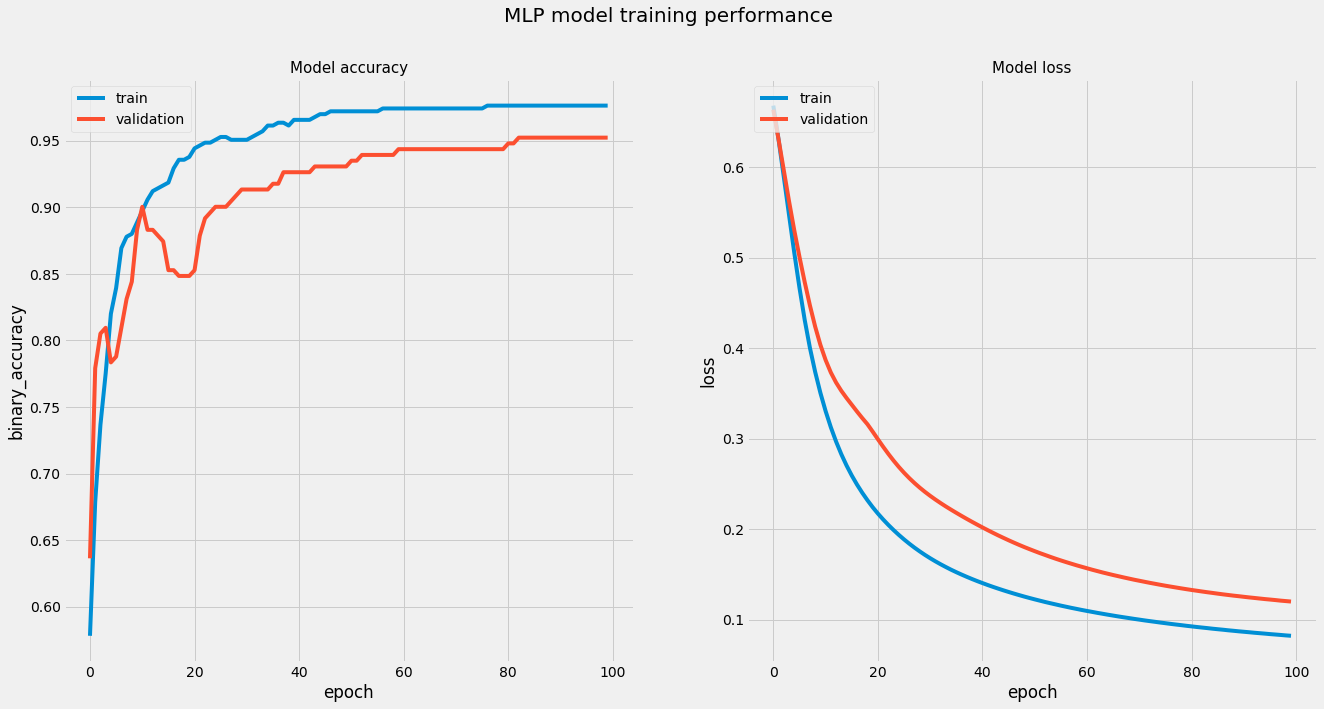

In [111]:
# MLP
fig, axs = plt.subplots(1,2)
fig.suptitle('MLP model training performance', fontsize=20)
axs[0].plot(history_MLP.history['binary_accuracy'])
axs[0].plot(history_MLP.history['val_binary_accuracy'])
axs[0].set_title('Model accuracy', fontsize=15)
axs[0].set_ylabel('binary_accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(history_MLP.history['loss'])
axs[1].plot(history_MLP.history['val_loss'])
axs[1].set_title('Model loss', fontsize=15)
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color= darkblue> LSTM

La red Long Short-Term Memory (LSTM), es una red neuronal recurrente que es entrenada usando backpropagation a través del tiempo (Backpropagation Through Time) y que supera el problema de vanishing/exploding gradient problem.

Su arquitectura vuelve a estar redes ideales para tratar datos sequenciales tales como series temporales.

En lugar de capas ocultas, las redes LSTM tienen bloques de memoria. Un tal bloque tiene componentes que las vuelve mas inteligentes que las capas ocultas clásicas y las provee de una noción de memoria a corto y largo plazo. Estos bloques de memoria están formados por compuertas lógicas que manejan el estado del bloque y su salida. Un bloque opera sobre una secuencia de entrada y cada compuerta usa funciones de activación sigmoideas para controlar si se activan o no, provocando los cambios de estado y agregando información nueva.

Los bloques están conformados por tres tipos de compuertas lógicas:

\begin{itemize}
\item Forget Gate: decide qué información eliminar del bloque;
\item Input Gate: decide qué valores de pesos de la entrada actualizar en el estado de memoria;
\item Output Gate: decide qué devolver a la salida basado en la entrada y en el estado de memoria del bloque.
\end{itemize}

Cada unidad de memoria es como una pequeña máquina de estado donde las compuertas tienen pesos que son aprendidos durante el entrenamiento.

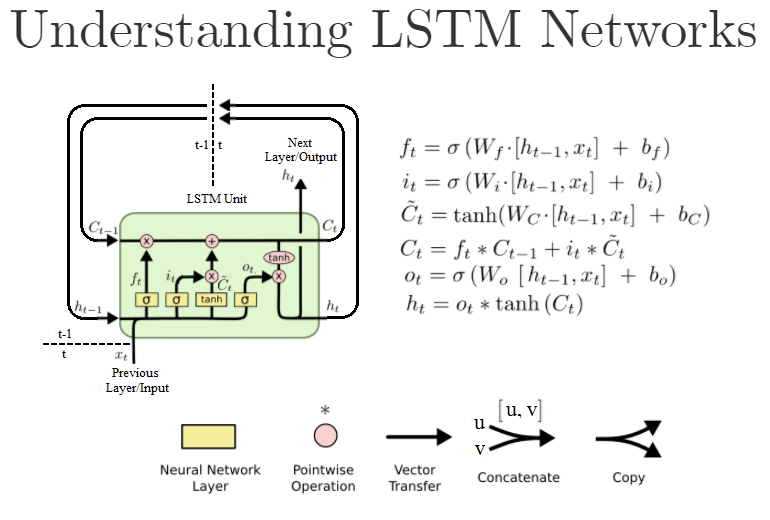

In [112]:
from IPython.display import Image
Image("img/LSTM.png")

#### <font color= darkblue> Definimos el modelo
    
Primero, definimos la red LSTM inicializando el modelo Sequential de Keras. Luego añadiremos dos capas LSTM y ajustaremos el dropout para mejorar el rendimiento del modelo. Finalmente, agregaremos dos capas densas para la salida.

Notar que otros hiperparámetros a modificar para mejorar el rendimiento son la cantidad de épocas (epochs) y el batch size. Hemos notado que un batch\_size=len(X\_train\_LSTM) y epochs=200 devuelven un buen modelo.

A continuación, compilaremos el modelo definido.

#### <font color= darkblue> Construcción del modelo LSTM
    
Como en el modelo anterior, definimos una función para construir el modelo basado en la red LSTM. En este caso agregamos un porcentaje de dropout (drop\_pct) que es un método de regularización que agrega información para resolver problemas mal condicionados o para reducir el overfitting.

In [113]:
def model_LSTM_(optimizer,activation,loss,metrics):
  model = Sequential()

  model.add(LSTM(units=256, input_shape = (X_train_LSTM.shape[1],X_train_LSTM.shape[2]), return_sequences=True)) 
  model.add(Dropout(0.4, seed=seed_value))

  model.add(LSTM(units=256, return_sequences=True))
  model.add(Dropout(0.4, seed=seed_value))

  model.add(LSTM(units=64, return_sequences=False))
  model.add(Dropout(0.4, seed=seed_value))

  model.add(Dense(64,  activation = activation))
  
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  return model

# Define the Model
model_LSTM=model_LSTM_(optimizer='adam',activation='relu',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [114]:
start_LSTM = time.time()
history_LSTM=model_LSTM.fit(X_train_LSTM, y_train, batch_size=len(X_train_LSTM), epochs=200, verbose=0, validation_split=0.33, shuffle=False)
end_LSTM = time.time()
LSTM_runtime=end_LSTM - start_LSTM

print('Runtime:',LSTM_runtime)

Runtime: 20.860077381134033


In [115]:
runtimes.append(LSTM_runtime)

In [116]:
print(model_LSTM.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 256)            268288    
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 256)            525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

#### <font color= darkblue> Visualización de precisión y pérdida en los conjuntos de entrenamiento y validación

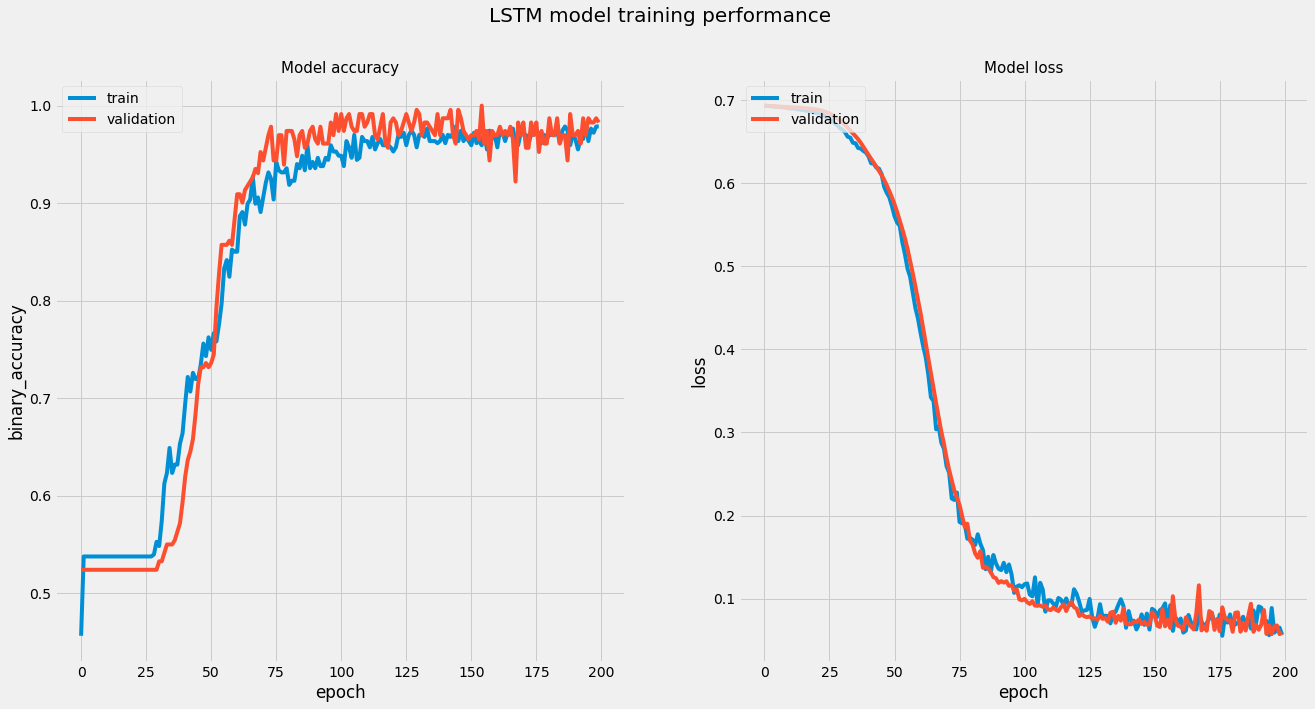

In [117]:
# LSTM
fig, axs = plt.subplots(1,2)
fig.suptitle('LSTM model training performance', fontsize=20)
axs[0].plot(history_LSTM.history['binary_accuracy'])
axs[0].plot(history_LSTM.history['val_binary_accuracy'])
axs[0].set_title('Model accuracy', fontsize=15)
axs[0].set_ylabel('binary_accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(history_LSTM.history['loss'])
axs[1].plot(history_LSTM.history['val_loss'])
axs[1].set_title('Model loss', fontsize=15)
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color= darkblue> Predicción
    
Ahora que tenemos ambas redes entrenadas, necesitamos testearlas en el test set. 
    
Como medidas del desempeño de ambas redes utilizaremos la binary_accuracy (cantidad de predicciones correctas dividido cantidad total de datos en la variable respuesta) y la binary_crossentropy (es el promedio de la pérdida de entropía cruzada categórica en muchas tareas de dos categorías).

In [118]:
# MLP
y_pred_MLP=MLP.predict(X_test, batch_size=1)
# LSTM
y_pred_LSTM=model_LSTM.predict(X_test_LSTM, batch_size=1)

#### <font color= darkblue> Métricas de desempeño en el test set

In [119]:
# MLP
results_MLP=MLP.evaluate(X_test, y_test)
print('MLP: [binary_crossentropy, binary_accuracy] =', results_MLP)

10/10 [==============================] - 0s 1ms/step - loss: 0.3029 - binary_accuracy: 0.8600
MLP: [binary_crossentropy, binary_accuracy] = [0.30292806029319763, 0.8600000143051147]


In [120]:
# LSTM
results_LSTM=model_LSTM.evaluate(X_test_LSTM, y_test)
print('LSTM: [binary_crossentropy, binary_accuracy] =', results_LSTM)

10/10 [==============================] - 0s 4ms/step - loss: 0.0571 - binary_accuracy: 0.9833
LSTM: [binary_crossentropy, binary_accuracy] = [0.05713072419166565, 0.9833333492279053]


Se ve que la red LSTM es muy superior a la MLP, y en general está entre los mejores modelos considerados.

### <font color= darkblue> 12. Model Averaging Ensemble

Para terminar con los modelos, mostramos un último aspecto.

Hemos visto que muchos de los modelos que probamos estaban overfitteados. Esto es un problema habitual en las series temporales y se suele dar por la correlación que existe entre el train set y el test set, debido a la dependencia temporal inherente en la serie. 

Para mejorar esta situación realizaremos un averaging ensemble combinando dos técnicas de remuestreo: block bootstraping y Time Series cross-validation.

#### <font color= darkblue> Block Bootstrap

La idea básica detrás del bootstrap es estimar las cantidades o características que nos interesan haciendo un resampleo con reposición de la muestra original. Cuando lidiamos con datos correlacionados en el tiempo, el simple resampleo no es adecuado debido a que de esta forma no podremos replicar la estructura de dependencia temporal inherente en los datos. Por esta razón, se han desarrollado otras técnicas de bootstrap para time series. Una de las técnicas mas comunes es la conocida como block bootstrap.

El block bootstrap intenta crear nuevas series temporales, con la misma dependencia que los datos original, utilizando la idea de resampleo de antes pero ya no tomando de a un dato por iteración sino separando los datos en bloques y tomando de a un bloque por iteración, con reposición. De esta manera, al tomar bloques en lugar de datos aislados, conservamos la dependencia temporal inherente.

In [121]:
len(X_train)

698

In [122]:
# creo muestras block bootstraps con bloques de longitud n=100
bs = StationaryBootstrap(100, X_train, y=y_train)
scores=[]
X_train_bs=[X_train]
y_train_bs=[y_train]
for data in bs.bootstrap(50):
    bs_X = data[0][0]
    bs_y = data[1]['y']
    # para cada muestra creada hago el split train/test
    #bs_X_train, bs_X_val, bs_y_train, bs_y_val = train_test_split(bs_X, bs_y, test_size=0.33, shuffle=False)
    X_train_bs.append(bs_X)
    #X_val.append(bs_X_val)
    y_train_bs.append(bs_y)
    #y_val.append(bs_y_val)
    # POR QUÉ NO APPENDEA EL VALIDATION SET?
X_train_bs = np.concatenate(X_train_bs);# X_val = np.concatenate(X_val)
y_train_bs = np.concatenate(y_train_bs);# y_val = np.concatenate(y_val)
X_train_bs=pd.DataFrame(X_train_bs,columns=X.columns)
y_train_bs=pd.DataFrame(y_train_bs,columns=['Sign'])

In [123]:
len(X_train_bs)

35598

In [124]:
X_train_bs.head(),y_train_bs.head()

(      CRUDE   Returns     sma60     MOM5D   MVRV_FF
 0  0.351830  0.408313  0.000000  0.413476  0.439516
 1  0.338253  0.520782  0.000377  0.419351  0.434044
 2  0.340024  0.457213  0.001276  0.411623  0.434606
 3  0.338843  0.425428  0.001562  0.412506  0.430302
 4  0.333530  0.386308  0.001854  0.406022  0.447226,
    Sign
 0     1
 1     1
 2     1
 3     1
 4     0)

#### <font color= darkblue> Time Series cross-validation
    
A continuación, realizaremos un Time Series cross-validation sobre el nuevo conjunto (mucho mas grande) de muestras bootstrap que generamos.

Esta técnica es una variación de KFold y provee indices para hacer el split train/test de la serie temporal observada en un intervalo de tiempo fijo. En el k-ésimo split, tendremos k folds como train set y el (k+1)-ésimo fold será el test set.

En primer lugar, definiremos una función cross\_model() para crear y fitear una lista de modelos en las muestras del crossvalidation.

In [125]:
# Realizamos un cross validation sobre un modelo fijo
def cross_model(model,X,Y):
    tscv = TimeSeriesSplit()
    models=[]
    for train_index, test_index in tscv.split(X):
#         print("TRAIN:", train_index, "TEST:", test_index)
        X__train, X__test = X.iloc[train_index], X.iloc[test_index]
        y__train, y__test = Y.iloc[train_index], Y.iloc[test_index]
        # if needed, do preprocessing here

        model.fit(X__train,y__train)
        
        models.append(model)
    return models
def cross_scores(model,X,Y):
    tscv = TimeSeriesSplit()
    scores=[]
    for train_index, test_index in tscv.split(X):
#         print("TRAIN:", train_index, "TEST:", test_index)
        X__train, X__test = X.iloc[train_index], X.iloc[test_index]
        y__train, y__test = Y.iloc[train_index], Y.iloc[test_index]
        # if needed, do preprocessing here

        model.fit(X__train,y__train)

        preds = model.predict(X__test)

        # accuracy for the current fold only    
        r2score = model.score(X__test,y__test)

        scores.append(r2score)
        
    # this is the average accuracy over all folds
    average_r2score = np.mean(scores)
    return average_r2score

#### <font color= darkblue> Averaging Ensemble

A continuación, definimos la función ensemble\_predictions() que toma una lista de modelos y un conjunto de datos, y devuelve la variable respuesta predicha por el ensamblador.

Uno puede ensamblar las predicciones (binarias) de múltiples modelos tomando la media del vector de predicciones de los modelos y luego, si es necesario, convirtiendo el vector resultante para que tenga valores en $\{0,1\}$ (por ejemplo usando LabelEncoder).

In [126]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(models, X):
    # make predictions
    yhats = [model.predict(X) for model in models]
    yhats = np.array(yhats)
    # mean across ensemble members
    mean = np.mean(yhats, axis=0)
    encoder = LabelEncoder() 
    return encoder.fit_transform(mean)

Veamos esta técnica de ensemble por ejemplos para el modelo de Naive Bayes.

In [127]:
modelos=[mnb,lr,knn,svm,clf,bg,adb,rf,ppr,MLP,LSTM]
modelos_nom=['mnb','lr','knn','svm','clf','bg','adb','rf','ppr','MLP','LSTM']

In [128]:
modelos

[MultinomialNB(),
 LogisticRegression(max_iter=1000),
 KNeighborsClassifier(algorithm='brute', n_jobs=-1),
 LinearSVC(C=100),
 DecisionTreeClassifier(),
 BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                          min_samples_split=10),
                    learning_rate=0.6, n_estimators=10),
 RandomForestClassifier(max_depth=9, n_estimators=30),
 ProjectionPursuitClassifier(),
 tensorflow.python.keras.layers.recurrent_v2.LSTM]

In [129]:
model=modelos[4] # We choose MultinomialNB()
# cross sample + ensemble
models=cross_model(model,X_train,y_train) 
preds = ensemble_predictions(models,X_test)
print('score con muestra cross+ensemble: %.3f' % accuracy_score(y_test,preds))
# bootstraped sample
model.fit(X_train_bs,y_train_bs)
print('score con muestra bts: %.3f' % accuracy_score(y_test,model.predict(X_test)))#cross_scores(model,X_test,y_test))#
# original sample
model.fit(X_train,y_train)
print('score con muestra original: %.3f' % accuracy_score(y_test,model.predict(X_test)))

score con muestra cross+ensemble: 1.000
score con muestra bts: 1.000
score con muestra original: 1.000


No se ve una gran mejoría respecto de la muestra original.

#### <font color= darkblue> Prediction Scores
    
Podemos estimar el desempeño del ensemble de un cierto tamaño $n$ fijo, seleccionando el número requerido de modelos de la lista de todos los modelos, llamando a la función ensemble_predictions() para hacer la predicción y luego calculando la precisión de la predicción comparada con los valores reales. La función evaluate\_n\_members() implementa esta idea.

In [130]:
# evaluate a specific number of members in an ensemble
def evaluate_n_members(models, n_members, X, y):
    # select a subset of members
    subset = models[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, X)
    # calculate accuracy
    return accuracy_score(y, yhat)

A continuación, guardamos la puntuación del ensemble de cada tamaño para un gráfico posterior, y el puntaje de cada modelo individual y la performance promedio obtenido.

In [131]:
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(models)+1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(models, i, X_test, y_test)
    # evaluate the i'th model standalone
    single_score = models[i-1].score(X_test, y_test)
    # summarize this step
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# summarize average accuracy of a single final model
print('Accuracy %.3f (%.3f)' % (np.mean(single_scores), np.std(single_scores)))

> 1: single=1.000, ensemble=1.000
> 2: single=1.000, ensemble=1.000
> 3: single=1.000, ensemble=1.000
> 4: single=1.000, ensemble=1.000
> 5: single=1.000, ensemble=1.000
Accuracy 1.000 (0.000)


No se observa ninguna mejoría utilizando el método ensemble.

\clearpage

# <font color= darkblue> Comparación de modelos

Comparemos los modelos según su puntaje de predicción, ''score'', y según sus curvas ROC.

### <font color= darkblue> Score
    
Enlistemos el desempeño de los modelos.

In [132]:
scores=[]
for i in range(0,len(modelos_nom)-2):
    aux=modelos[i].score(X_test,y_test)
    scores.append(aux)
    print('El modelo '+modelos_nom[i]+' tiene un score de: %.3f' % aux)
scores.append(results_MLP[1])
print('El modelo '+modelos_nom[9]+' tiene un score de: %.3f' % results_MLP[1])
scores.append(results_LSTM[1])
print('El modelo '+modelos_nom[10]+' tiene un score de: %.3f' % results_LSTM[1])

El modelo mnb tiene un score de: 0.567
El modelo lr tiene un score de: 0.927
El modelo knn tiene un score de: 0.713
El modelo svm tiene un score de: 0.993
El modelo clf tiene un score de: 1.000
El modelo bg tiene un score de: 1.000
El modelo adb tiene un score de: 1.000
El modelo rf tiene un score de: 1.000
El modelo ppr tiene un score de: 0.683
El modelo MLP tiene un score de: 0.860
El modelo LSTM tiene un score de: 0.983


### <font color= darkblue> Curvas ROC
    
Una curva característica de funcionamiento del receptor (curva ROC) es un diagrama gráfico que ilustra la capacidad de diagnóstico de un sistema clasificador binario a medida que varía su umbral de discriminación.

La curva ROC es creada graficando el ratio true positive (TPR) contra el ratio false positive (FPR) en varios umbrales de ajuste. En machine learning el TPR es también conocido como sensitividad, recall o probabilidada de detección. El FPR es conocido como la probabilidad de una falsa alarma y es calculado como (1 - especificidad).

Esta curva puede pensarse también como el gráfico del poder (power) como función del error tipo 1 de una regla de decisión. La curva ROC es entonces la sensitividad o recall como función del fall-out. 

El análisis de esta curva provee una herramienta para la selección del modelo óptimo sobre subóptimos independientemente de la noción de costo que estemos manejando y la distribución de la variable respuesta.

Para poder graficar las curvas ROC en simultáneo definiremos una lista con las predicciones de todos los modelos sobre el test set.

In [133]:
predicciones=pd.DataFrame()
for i in range(0,len(modelos)-1):
    predicciones[modelos_nom[i]]=np.where(modelos[i].predict(X_test)>=0.5,1,0)
predicciones[modelos_nom[10]]=np.where(model_LSTM.predict(X_test_LSTM, batch_size=1)>=0.5,1,0)
predicciones.index=X[::-1][split:].index

In [134]:
predicciones.head()

,mnb,lr,knn,svm,clf,bg,adb,rf,ppr,MLP,LSTM
Date,,,,,,,,,,,
2020-01-03,1,0,0,0,0,0,0,0,0,0,0
2020-01-06,1,1,1,1,1,1,1,1,1,1,1
2020-01-07,1,1,1,1,1,1,1,1,1,1,1
2020-01-08,1,1,1,1,1,1,1,1,1,1,1
2020-01-09,1,0,0,0,0,0,0,0,0,0,0


In [135]:
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc = []
for i in range(0,len(modelos_nom)):
    lr_auc.append(np.array(roc_auc_score(y_test, predicciones[modelos_nom[i]])))

Ploteamos las curvas ROC. Realizaremos los gráficos en dos partes para una mejor visualización.

No Skill: ROC AUC=0.500
mnb: ROC AUC=0.529
lr: ROC AUC=0.930
knn: ROC AUC=0.713
svm: ROC AUC=0.992
clf: ROC AUC=1.000
bg: ROC AUC=1.000


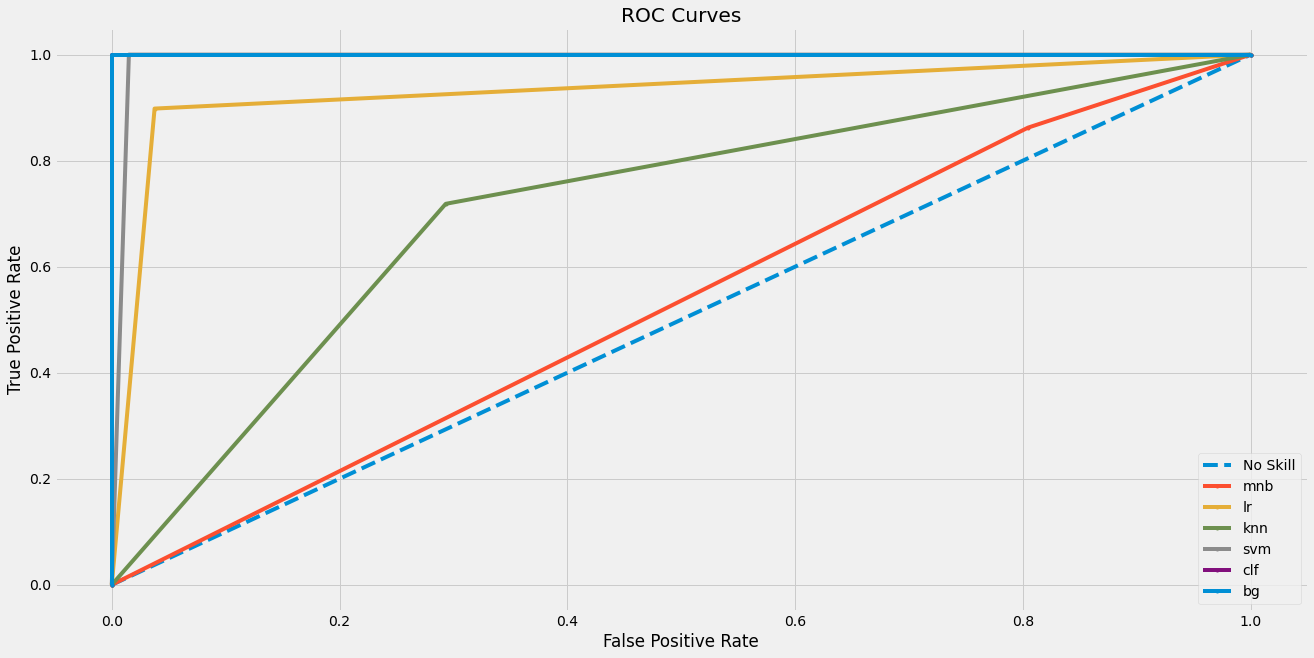

In [136]:
# ROC Curves Part 1
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
for i in range(0,len(modelos_nom)-5):
    print(modelos_nom[i] + ': ROC AUC=%.3f' % (lr_auc[i]))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

for i in range(0,len(modelos_nom)-5):
    lr_fpr=roc_curve(y_test,predicciones[modelos_nom[i]])[0]
    lr_tpr=roc_curve(y_test,predicciones[modelos_nom[i]])[1]
    plt.plot(lr_fpr, lr_tpr, marker='.', label=modelos_nom[i])
plt.title('ROC Curves')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
adb: ROC AUC=1.000
rf: ROC AUC=1.000
ppr: ROC AUC=0.676
MLP: ROC AUC=0.842
LSTM: ROC AUC=0.981


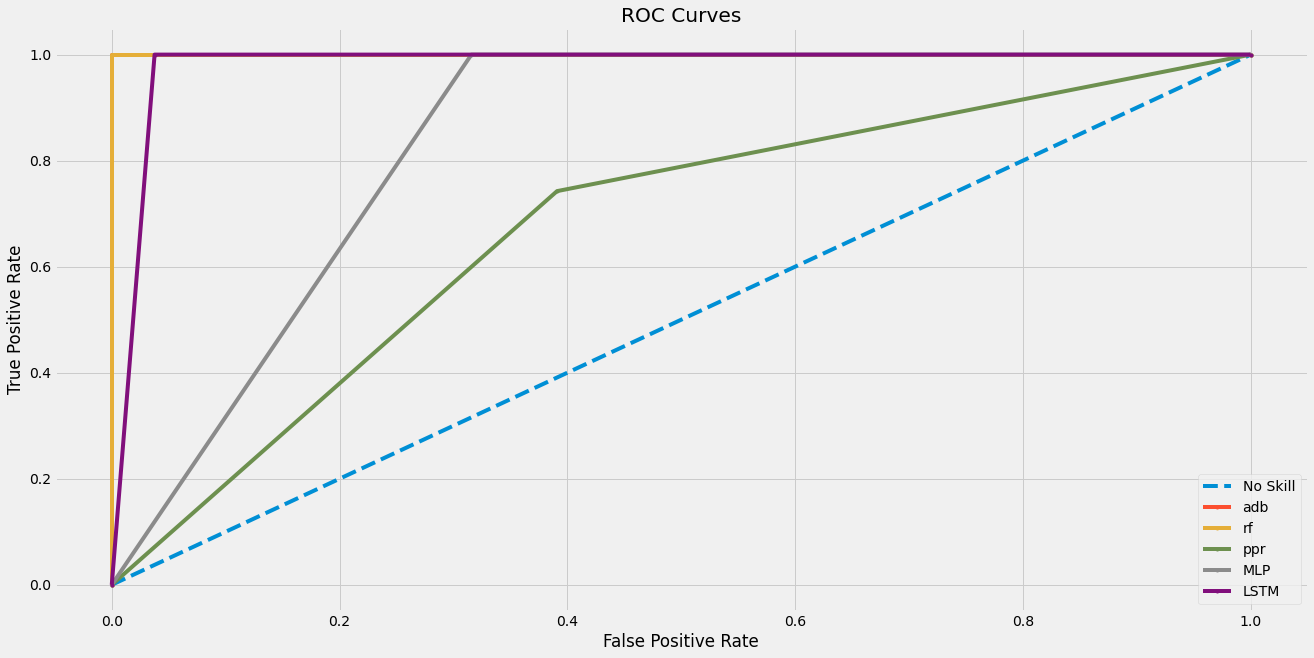

In [137]:
# ROC Curves Part 2
print('No Skill: ROC AUC=%.3f' % (ns_auc))
for i in range(6,len(modelos_nom)):
    print(modelos_nom[i] + ': ROC AUC=%.3f' % (lr_auc[i]))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

for i in range(6,len(modelos_nom)):
    lr_fpr=roc_curve(y_test,predicciones[modelos_nom[i]])[0]
    lr_tpr=roc_curve(y_test,predicciones[modelos_nom[i]])[1]
    plt.plot(lr_fpr, lr_tpr, marker='.', label=modelos_nom[i])
plt.title('ROC Curves')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### <font color= darkblue> Estrategias: Predicción vs Realidad
    
A continuación plotearemos el movimiento real del BTC y las estrategias resultantes de seguir las predicciones de los modelos.

En primer lugar, necesitamos manejarnos con los valores reales de los retornos de BTC y no con los escalados. Con lo cual, trabajaremos con un nuevo dataframe con los valores sin escalamiento.

In [138]:
X_aux = Bitcoin[::-1][split:]
X_aux = pd.DataFrame(Bitcoin,columns=Bitcoin.columns,index=Bitcoin[::-1][split:].index)

Para poder hacer los gráficos simultáneamente, definiremos para cada modelo dos nuevas columnas en el dataset: una con las predicciones y otra con las estrategias. Donde por estrategia entendemos a comprar (''longear'') si el predictor indica $1$ y a vender (''shortear'') si indica $-1$ ($0$).

In [139]:
for i in range(0,len(modelos_nom)):
    X_aux['prediction_'+modelos_nom[i]] = np.where(predicciones[modelos_nom[i]] >= 0.5, 1, -1)
    X_aux['strategy'+modelos_nom[i]] = X_aux['prediction_'+modelos_nom[i]] * \
                                X_aux['Returns']

A continuación graficamos el movimiento real del BTC vs las estrategias. Dividiremos los casos en dos gráficos para que no haya un amontonamiento de plots.

Retorno acumulado usando strategy_mnb: 2.350000.3
Retorno acumulado usando strategy_lr: 8.582000.3
Retorno acumulado usando strategy_knn: 6.854000.3
Retorno acumulado usando strategy_svm: 8.842000.3
Retorno acumulado usando strategy_clf: 8.846000.3
Retorno acumulado usando strategy_bg: 8.846000.3


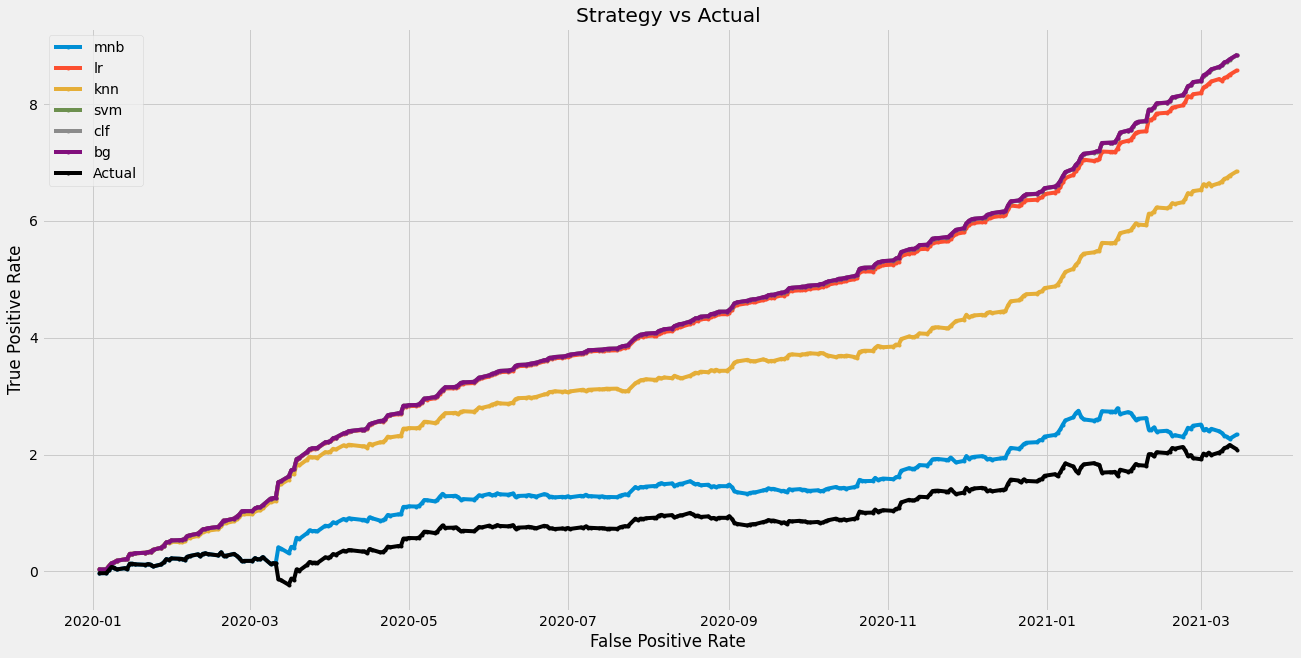

In [140]:
# Strategies Part 1
for i in range(0,len(modelos_nom)-5):
    plt.plot(X_aux['strategy'+modelos_nom[i]].cumsum(),marker='.', label=modelos_nom[i])
    print('Retorno acumulado usando strategy_'+modelos_nom[i]+': %f.3' % X_aux['strategy'+modelos_nom[i]].sum())
plt.plot(X_aux['Returns'].cumsum(),marker='.', label='Actual',color='black')
plt.title('Strategy vs Actual')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

Retorno acumulado usando strategy_adb: 8.846000.3
Retorno acumulado usando strategy_rf: 8.846000.3
Retorno acumulado usando strategy_ppr: 3.600000.3
Retorno acumulado usando strategy_MLP: 8.142000.3
Retorno acumulado usando strategy_LSTM: 8.832000.3


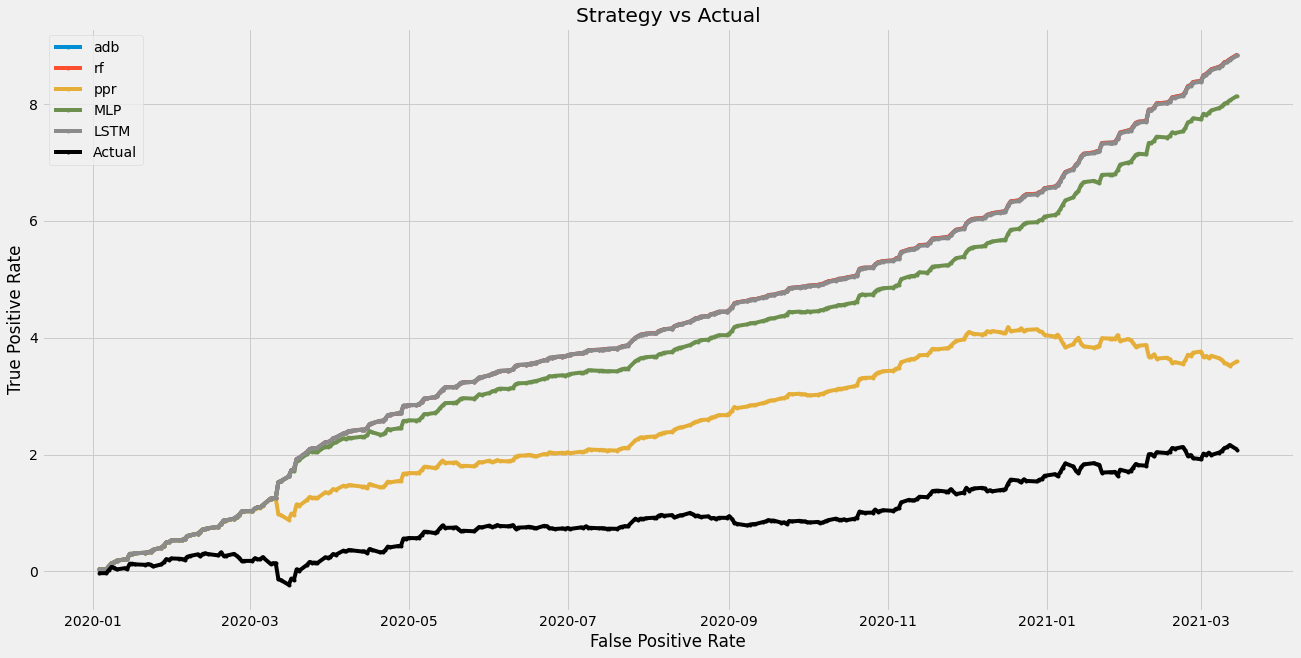

In [141]:
# Strategies Part 2
for i in range(6,len(modelos_nom)):
    plt.plot(X_aux['strategy'+modelos_nom[i]].cumsum(),marker='.', label=modelos_nom[i])
    print('Retorno acumulado usando strategy_'+modelos_nom[i]+': %f.3' % X_aux['strategy'+modelos_nom[i]].sum())
plt.plot(X_aux['Returns'].cumsum(),marker='.', label='Actual',color='black')
plt.title('Strategy vs Actual')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

Veamos cuál es la estrategia ganadora.

In [142]:
strategies=[]
for i in range(0,len(modelos_nom)):
    aux=X_aux['strategy'+modelos_nom[i]].sum()
    strategies.append(aux)
    print('La estrategia de '+modelos_nom[i]+' tiene un retorno acumulado de: %.3f' % aux)

La estrategia de mnb tiene un retorno acumulado de: 2.350
La estrategia de lr tiene un retorno acumulado de: 8.582
La estrategia de knn tiene un retorno acumulado de: 6.854
La estrategia de svm tiene un retorno acumulado de: 8.842
La estrategia de clf tiene un retorno acumulado de: 8.846
La estrategia de bg tiene un retorno acumulado de: 8.846
La estrategia de adb tiene un retorno acumulado de: 8.846
La estrategia de rf tiene un retorno acumulado de: 8.846
La estrategia de ppr tiene un retorno acumulado de: 3.600
La estrategia de MLP tiene un retorno acumulado de: 8.142
La estrategia de LSTM tiene un retorno acumulado de: 8.832


\clearpage

#  <font color= darkblue> Conclusión
    
Hemos mostrado cómo se crean y entrenan distintos modelos estadísticos para un mismo set de datos y para resolver la misma tarea de clasificación.
    
Además, hemos comparado los modelos en términos del puntaje de predicción de cada uno y en términos de sus curvas ROC.
    
Para terminar de encontrar los mejores modelos clasifiquemos a los modelos según su velocidad de entrenamiento, su puntaje de predicción y su nivel de sobreajuste.

#### <font color= darkblue> Mejor velocidad de convergencia
    
En términos de velocidad de entrenamiento, tenemos la siguiente clasificación

In [143]:
modelos_nom.insert(8,'evc')# We have to add 'evc'

In [144]:
min_coef_index=list(np.argsort(runtimes))
for i in min_coef_index:
    print('El tiempo de demora del modelo '+modelos_nom[i]+' es: %f' % runtimes[i])

El tiempo de demora del modelo knn es: 0.003349
El tiempo de demora del modelo mnb es: 0.003799
El tiempo de demora del modelo clf es: 0.004006
El tiempo de demora del modelo svm es: 0.012308
El tiempo de demora del modelo adb es: 0.015017
El tiempo de demora del modelo lr es: 0.020827
El tiempo de demora del modelo bg es: 0.040603
El tiempo de demora del modelo evc es: 0.068766
El tiempo de demora del modelo rf es: 0.076732
El tiempo de demora del modelo ppr es: 2.731874
El tiempo de demora del modelo LSTM es: 20.860077
El tiempo de demora del modelo MLP es: 38.904830


El modelo con mejor runtime es

In [145]:
modelos_nom[runtimes.index(np.min(runtimes))]

'knn'

#### <font color= darkblue> Mejor puntaje de prediccion
    
En términos de la mejor predicción en el test set tenemos la siguiente clasificación

In [146]:
modelos_nom.remove('evc') # We have to remove 'evc'

In [147]:
min_coef_index=list(np.argsort(scores)[::-1])
for i in min_coef_index:
    print('El modelo '+modelos_nom[i]+' tiene un score de: %f' % scores[i])

El modelo rf tiene un score de: 1.000000
El modelo adb tiene un score de: 1.000000
El modelo bg tiene un score de: 1.000000
El modelo clf tiene un score de: 1.000000
El modelo svm tiene un score de: 0.993333
El modelo LSTM tiene un score de: 0.983333
El modelo lr tiene un score de: 0.926667
El modelo MLP tiene un score de: 0.860000
El modelo knn tiene un score de: 0.713333
El modelo ppr tiene un score de: 0.683333
El modelo mnb tiene un score de: 0.566667


#### <font color= darkblue> Peor sobreajuste
    
Según la tabla anterior, los algoritmos con peor sobreajuste son claramente: rf, adb, bg y clf. Es decir, todos los ligados a árboles de decisión.

#### <font color= darkblue> Los mejores modelos

Los mejores tres modelos teniendo en cuenta las dos métricas anteriores podemos decir que son: knn, svm y lr.

\begin{thebibliography}{}
    
    \bibitem{}
    C. Alexander et. al. \textit{Price discovery in Bitcoin: The impact of unregulated markets}. Journal of Financial Stability, Volume 50, October 2020.

    \bibitem{}
    C. Alexander. \textit{Bitcoin Derivatives: the impact of Unregulated Markets on Price Discovery and Introducing the BVIX}. 6th Quant Insights Conference https://www.qiconference.com/

    \bibitem{}
    T. Guida. \textit{Big Data and Machine Learning in Quantitative Investment}. John Wiley \& Sons, Ltd. ISBN 9781119522195. (2019)

    \bibitem{}
    Y. Hilpisch. \textit{Python for Algorithmic Trading}. O’Reilly Media, Inc. (2020)

    \bibitem{}
    Matt H and Daniel R. \textit{Practical Advice for Building Deep Neural Networks}. https://pcc.cs.byu.edu/2017/10/02/practical-advice-for-building-deep-neural-networks/

    \bibitem{}
    S. Nakamoto. \textit{Bitcoin: A Peer-to Peer Electronic Cash System}. white paper (2008). Available at https://bitcoin.org/bitcoin.pdf

    \bibitem{}
    Pang et. al. \textit{Stock Market Prediction based on Deep Long Short-Term Memory Neural network}. Proceedings of the 3rd International Conference on Complexity, Future Information Systems and Risk (COMPLEXIS 2018), pages 102-108. ISBN: 9789897582974
    
    \bibitem{}
    K. Singaravelu. \textit{Introduction to Deep Learning \& Neural Networks}. CQF Lecture series – Module 5 Data Science and Machine Learning II – October, 2020

    \bibitem{}
    K. Singaravelu. \textit{Application of Neural Networks}. CQF Python Labs – October, 2020

    \bibitem{}
    Roc curve:  "Detector Performance Analysis Using ROC Curves - MATLAB \& Simulink Example". www.mathworks.com. Retrieved 11 August 2016.

    \bibitem{}
    MinMaxScaler: https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.

    \bibitem{}
    Decision Tree Classifier: https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3.

    \bibitem{}
    Projection Pursuit Classifier: https://pavelkomarov.com/projection-pursuit/skpp.html\#module-skpp.

    \bibitem{}
    Averaging ensemble: https://machinelearningmastery.com/weighted-average-ensemble-for-deep-learning-neural-networks/.

    \bibitem{}
    Time series cross validation: https://robjhyndman.com/hyndsight/tscv/.

    \bibitem{}
    For further information on blockchain technology, please consult Ahonen E. (2021) Blockland - 21 Stories of Bitcoin, Blockchain, and Cryptocurrency available at https://www.cryptonumist.com/
	
\end{thebibliography}